In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from scipy.stats import shapiro
from imblearn.over_sampling import RandomOverSampler


In [57]:
hr= pd.read_csv("hr train data.csv")
hr.head()

,sno,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,1,36,YES
1,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,NO
2,2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83,NO
3,3,33241,city_115,0.789,Male,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,never,52,YES
4,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4,8,NO


In [3]:
hr.columns

Index(['sno', 'enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'job_change'],
      dtype='object')

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sno                     19158 non-null  int64  
 1   enrollee_id             19158 non-null  int64  
 2   city                    19158 non-null  object 
 3   city_development_index  19158 non-null  float64
 4   gender                  19158 non-null  object 
 5   relevent_experience     19158 non-null  object 
 6   enrolled_university     18772 non-null  object 
 7   education_level         19158 non-null  object 
 8   major_discipline        19158 non-null  object 
 9   experience              19093 non-null  float64
 10  company_size            13220 non-null  object 
 11  company_type            13018 non-null  object 
 12  last_new_job            18735 non-null  object 
 13  training_hours          19158 non-null  int64  
 14  job_change              19158 non-null

In [5]:
(hr.isnull().sum()/len(hr))*100

sno                        0.000000
enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                     0.000000
relevent_experience        0.000000
enrolled_university        2.014824
education_level            0.000000
major_discipline           0.000000
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
job_change                 0.000000
dtype: float64

In [6]:
hr.drop(["sno","enrollee_id"], axis=1, inplace=True)

In [7]:
hr.select_dtypes(include="object").columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job', 'job_change'],
      dtype='object')

In [8]:
hr.select_dtypes(exclude="object").columns

Index(['city_development_index', 'experience', 'training_hours'], dtype='object')

In [9]:
hr.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,1,36,YES
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,NO
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,never,83,NO
3,city_115,0.789,Male,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,never,52,YES
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4,8,NO


## columns with unique values in them

In [61]:
hr.nunique()# unique values count

sno                       19158
enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   21
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
job_change                    2
dtype: int64

##### Null value imputation for enrolled university

In [10]:
hr.enrolled_university.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [11]:
pd.set_option("display.max_rows", None)

In [12]:
hr.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [13]:
hr.enrolled_university.fillna("no_enrollment",inplace=True)

In [14]:
(hr.isnull().sum()/len(hr))*100

city                       0.000000
city_development_index     0.000000
gender                     0.000000
relevent_experience        0.000000
enrolled_university        0.000000
education_level            0.000000
major_discipline           0.000000
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
job_change                 0.000000
dtype: float64

##### Null value imputation for last new job

In [15]:
hr.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [16]:
hr.last_new_job.value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [17]:
hr[(hr.relevent_experience=="No relevent experience") & (hr.last_new_job=="never")].count()

city                      1751
city_development_index    1751
gender                    1751
relevent_experience       1751
enrolled_university       1751
education_level           1751
major_discipline          1751
experience                1744
company_size               170
company_type               377
last_new_job              1751
training_hours            1751
job_change                1751
dtype: int64

In [18]:
hr[(hr.relevent_experience=="Has relevent experience")]["last_new_job"].value_counts()

1        6018
>4       2765
2        2370
4         876
3         839
never     701
Name: last_new_job, dtype: int64

In [19]:
hr[(hr.relevent_experience=="Has relevent experience") & (hr.last_new_job.isnull())]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
58,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,2.0,Oct-49,Funded Startup,NaN,32,YES
205,city_11,0.550,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,50-99,Pvt Ltd,NaN,7,YES
391,city_90,0.698,Male,Has relevent experience,Full time course,Masters,No Major,NaN,NaN,NaN,NaN,44,YES
575,city_45,0.890,Male,Has relevent experience,no_enrollment,Graduate,STEM,9.0,50-99,Pvt Ltd,NaN,62,NO
719,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,11.0,NaN,NaN,NaN,11,YES
770,city_16,0.910,Male,Has relevent experience,Full time course,Masters,STEM,5.0,50-99,NaN,NaN,92,NO
891,city_146,0.735,Male,Has relevent experience,Full time course,Graduate,STEM,3.0,100-500,NaN,NaN,18,NO
909,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,9.0,5000-9999,Pvt Ltd,NaN,14,NO
994,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,2.0,100-500,NaN,NaN,37,YES
1187,city_74,0.579,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,Oct-49,NaN,NaN,57,NO


<AxesSubplot:>

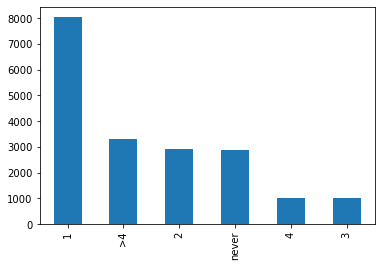

In [20]:
hr.last_new_job.fillna("never").value_counts().plot.bar() 
# checking if filling with never will make changes in overall distribution 

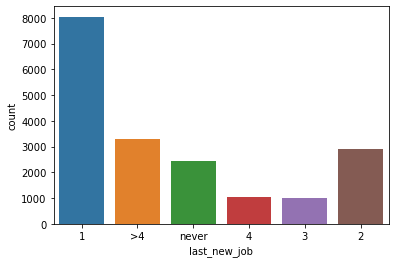

In [21]:
sns.countplot(x="last_new_job", data=hr) #distrbution without filling na with never
plt.show()

In [22]:
hr.last_new_job.fillna("never",inplace=True)

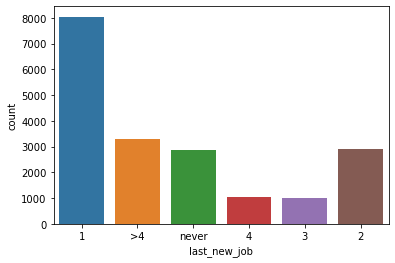

In [23]:
sns.countplot(x="last_new_job", data=hr) # dist still intact
plt.show()

##### null value imputation for company type

In [24]:
(hr.isnull().sum()/len(hr))*100

city                       0.000000
city_development_index     0.000000
gender                     0.000000
relevent_experience        0.000000
enrolled_university        0.000000
education_level            0.000000
major_discipline           0.000000
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               0.000000
training_hours             0.000000
job_change                 0.000000
dtype: float64

In [25]:
hr.company_type.value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [26]:
hr.company_type.unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [27]:
hr.company_type.fillna("Other", inplace=True) #if compnay_type not known make sense to fill with other 

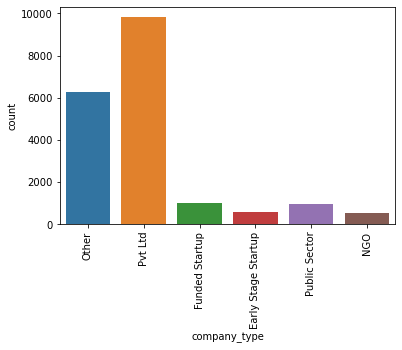

In [28]:
sns.countplot(x="company_type", data=hr)
plt.xticks(rotation=90)
plt.show()

##### Null value imputation for experience

In [29]:
hr.isnull().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                  65
company_size              5938
company_type                 0
last_new_job                 0
training_hours               0
job_change                   0
dtype: int64

In [30]:
hr.experience.unique()

array([20., 15.,  5.,  0., 11., 13.,  7., 17.,  2., 16.,  1.,  4., 10.,
       14., 18., 19., 12.,  3.,  6.,  9.,  8., nan])

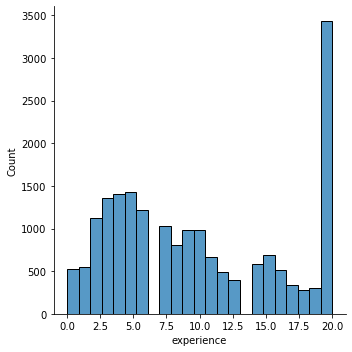

In [31]:
sns.displot(hr.experience)
plt.show()

In [32]:
hr.groupby("relevent_experience")["experience"].median()

relevent_experience
Has relevent experience    10.0
No relevent experience      4.0
Name: experience, dtype: float64

In [33]:
hr.loc[(hr.relevent_experience=="Has relevent experience") & (hr.experience.isnull()), "experience"]=10.0
hr.loc[(hr.relevent_experience=="No relevent experience") & (hr.experience.isnull()), "experience"]=4.0

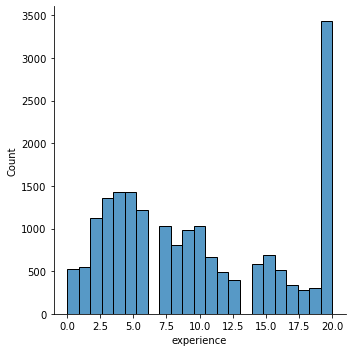

In [34]:
sns.displot(hr.experience)
plt.show()

In [35]:
hr.isnull().sum()

city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              5938
company_type                 0
last_new_job                 0
training_hours               0
job_change                   0
dtype: int64

##### Null value imputation for company size

In [36]:
hr.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
Oct-49       1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [37]:
hr.company_size= hr.company_size.str.replace("Oct-49","49")

In [38]:
hr.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
49           1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [39]:
hr.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '49',
       '100-500', '500-999'], dtype=object)

In [40]:
hr[hr.company_size.isnull()]["company_type"].value_counts()

Other                  5368
Pvt Ltd                 406
Public Sector           129
NGO                      26
Funded Startup            6
Early Stage Startup       3
Name: company_type, dtype: int64

In [41]:
hr.groupby("company_type")["company_size"].value_counts()

company_type         company_size
Early Stage Startup  <10              286
                     49               176
                     50-99            109
                     100-500           27
                     500-999            2
Funded Startup       50-99            390
                     100-500          214
                     49               193
                     <10              144
                     500-999           54
NGO                  100-500          174
                     50-99             77
                     1000-4999         73
                     10000+            37
                     500-999           37
                     <10               36
                     49                32
                     5000-9999         29
Other                50-99            240
                     100-500          172
                     49               117
                     10000+            93
                     <10               79


In [42]:
hr.groupby("company_type")["company_size"].count()

company_type
Early Stage Startup     600
Funded Startup          995
NGO                     495
Other                   893
Public Sector           826
Pvt Ltd                9411
Name: company_size, dtype: int64

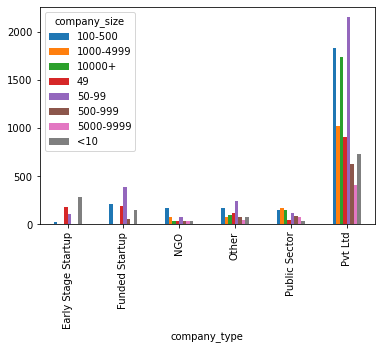

In [43]:
pd.crosstab(hr.company_type,hr.company_size).plot.bar()
plt.show()

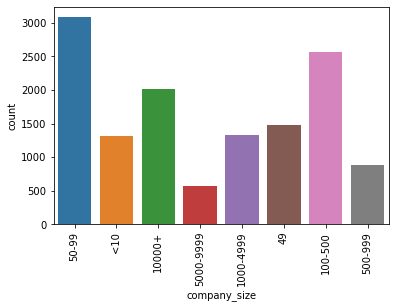

In [44]:
sns.countplot(x="company_size", data=hr)
plt.xticks(rotation=90)
plt.show()

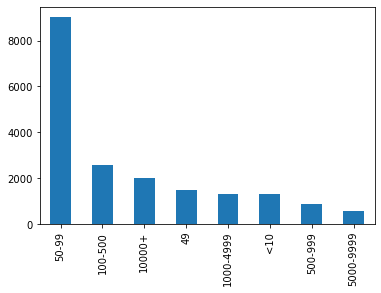

In [45]:
hr.company_size.fillna("50-99").value_counts().plot.bar() 
plt.show()
# if we fill by 50-90 the count of 50-90 will drastically increase from 3000 to 8000

In [46]:
hr.loc[(hr.company_type=="Other") & (hr.company_size.isnull()), "company_size"]="50-99"
hr.loc[(hr.company_type=="Early Stage Startup") & (hr.company_size.isnull()), "company_size"]="<10"
hr.loc[(hr.company_type=="Funded Startup") & (hr.company_size.isnull()), "company_size"]="50-99"
hr.loc[(hr.company_type=="Public Sector") & (hr.company_size.isnull()), "company_size"]="1000-4999"
hr.loc[(hr.company_type=="NGO") & (hr.company_size.isnull()), "company_size"]="100-500"
hr.loc[(hr.company_type=="Pvt Ltd") & (hr.company_size.isnull()), "company_size"]="50-99"

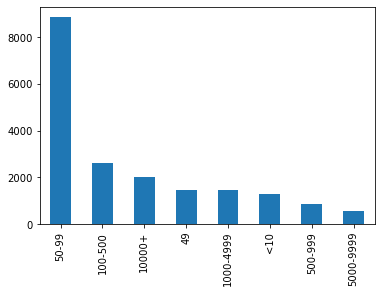

In [47]:
hr.company_size.value_counts().plot.bar()
plt.show()

## outliers in the data 

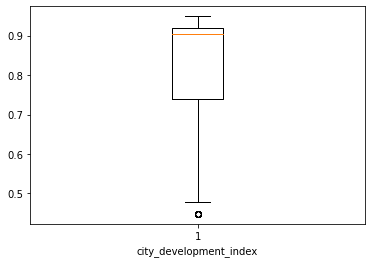

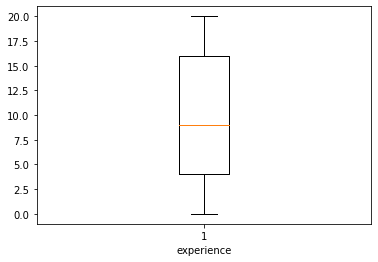

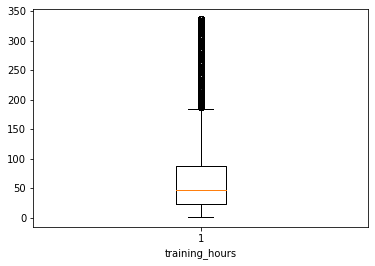

In [55]:
for i in hr.select_dtypes(include=np.number).columns:
    plt.boxplot(hr[i])
    plt.xlabel(i)
    plt.show()

## UNIVARIATE ANALYSIS

### CATEGORICAL COL

In [48]:
hr.select_dtypes(include="object").columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job', 'job_change'],
      dtype='object')

In [49]:
def uni_cat(x):
    sns.countplot(x=x, data=hr)
    plt.show()
    print(hr[x].value_counts(normalize=True)*100)
    print("the category with highest number of frequency is ",hr[x].mode()[0])

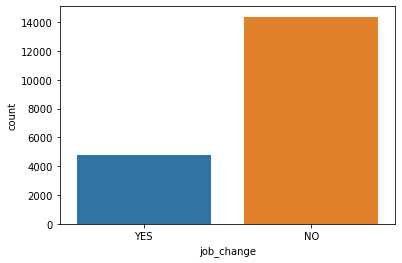

NO     75.065247
YES    24.934753
Name: job_change, dtype: float64
the category with highest number of frequency is  NO


In [50]:
uni_cat("job_change")

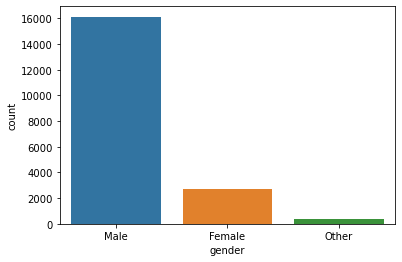

Male      84.173713
Female    14.046351
Other      1.779935
Name: gender, dtype: float64
the category with highest number of frequency is  Male


In [51]:
uni_cat("gender")

In [52]:
hr.gender.value_counts(1)

Male      0.841737
Female    0.140464
Other     0.017799
Name: gender, dtype: float64

In [53]:
hr.groupby("gender")["job_change"].value_counts()

gender  job_change
Female  NO             1935
        YES             756
Male    NO            12208
        YES            3918
Other   NO              238
        YES             103
Name: job_change, dtype: int64

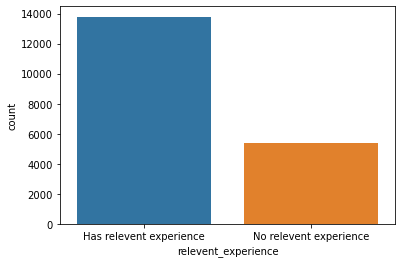

Has relevent experience    71.990813
No relevent experience     28.009187
Name: relevent_experience, dtype: float64
the category with highest number of frequency is  Has relevent experience


In [54]:
uni_cat("relevent_experience")

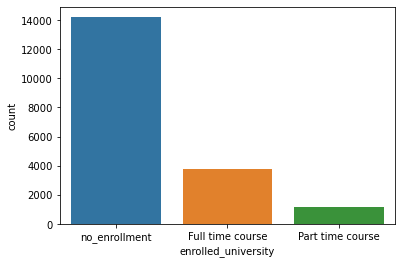

no_enrollment       74.136131
Full time course    19.610607
Part time course     6.253262
Name: enrolled_university, dtype: float64
the category with highest number of frequency is  no_enrollment


In [55]:
uni_cat("enrolled_university")

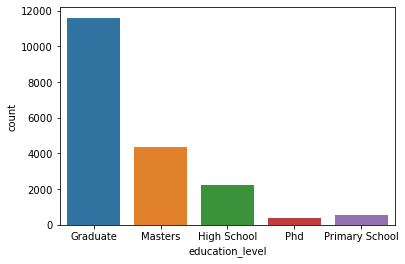

Graduate          60.538678
Masters           22.763336
High School       11.728782
Primary School     2.808226
Phd                2.160977
Name: education_level, dtype: float64
the category with highest number of frequency is  Graduate


In [56]:
uni_cat("education_level")

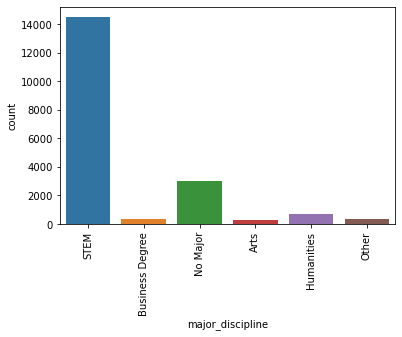

STEM               75.644639
No Major           15.847166
Humanities          3.492014
Other               1.988725
Business Degree     1.706859
Arts                1.320597
Name: major_discipline, dtype: float64
the category with highest number of frequency is  STEM


In [57]:
sns.countplot(x="major_discipline", data=hr)
plt.xticks(rotation=90)
plt.show()
print(hr["major_discipline"].value_counts(normalize=True)*100)
print("the category with highest number of frequency is ",hr["major_discipline"].mode()[0])

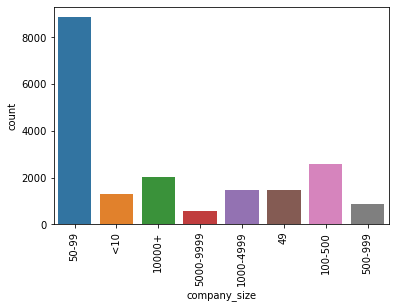

50-99        46.262658
100-500      13.555695
10000+       10.538678
49            7.678255
1000-4999     7.605178
<10           6.843094
500-999       4.577722
5000-9999     2.938720
Name: company_size, dtype: float64
the category with highest number of frequency is  50-99


In [58]:
sns.countplot(x="company_size", data=hr)
plt.xticks(rotation=90)
plt.show()
print(hr["company_size"].value_counts(normalize=True)*100)
print("the category with highest number of frequency is ",hr["company_size"].mode()[0])

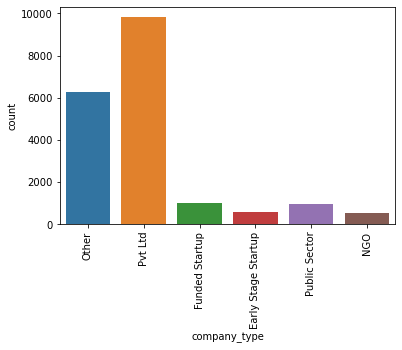

Pvt Ltd                51.242301
Other                  32.680864
Funded Startup          5.224971
Public Sector           4.984863
Early Stage Startup     3.147510
NGO                     2.719491
Name: company_type, dtype: float64
the category with highest number of frequency is  Pvt Ltd


In [59]:
sns.countplot(x="company_type", data=hr)
plt.xticks(rotation=90)
plt.show()
print(hr["company_type"].value_counts(normalize=True)*100)
print("the category with highest number of frequency is ",hr["company_type"].mode()[0])

### NUMERICAL COL

In [60]:
hr.select_dtypes(exclude="object").columns

Index(['city_development_index', 'experience', 'training_hours'], dtype='object')

In [61]:
def uni_num(x):
    sns.displot(hr[x])
    plt.show()
    sns.boxplot(x=x,data=hr)
    plt.show()
    print("skewness of the ",x,"column is ",hr[x].skew())
    probplot(hr[x],plot=plt)
    plt.show()

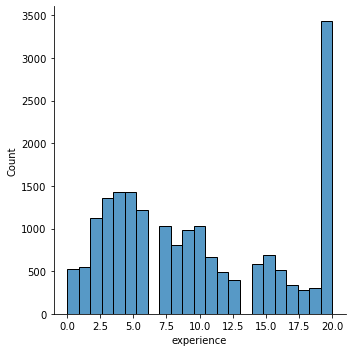

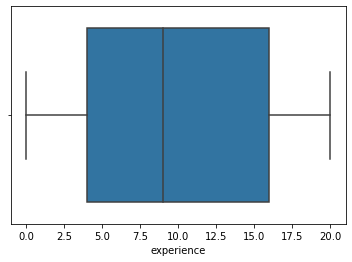

skewness of the  experience column is  0.3410292909488931


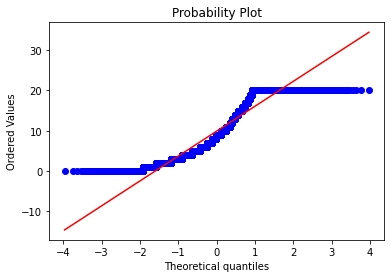

In [62]:
uni_num("experience")

In [63]:
hr.experience.describe()

count    19158.000000
mean         9.921704
std          6.497186
min          0.000000
25%          4.000000
50%          9.000000
75%         16.000000
max         20.000000
Name: experience, dtype: float64

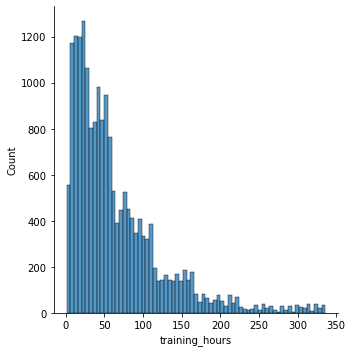

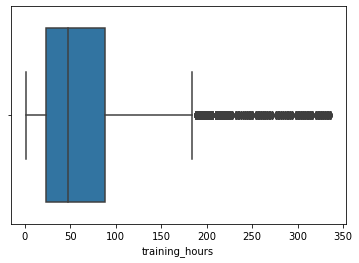

skewness of the  training_hours column is  1.8192372420221026


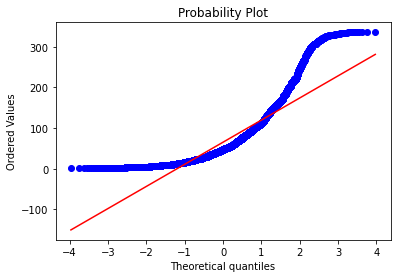

In [64]:
uni_num("training_hours")

In [65]:
hr.training_hours.describe()

count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

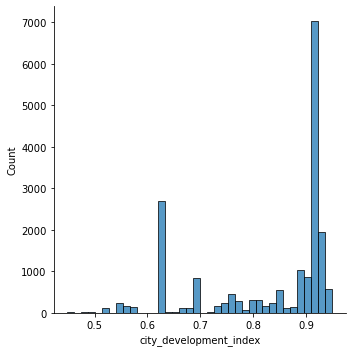

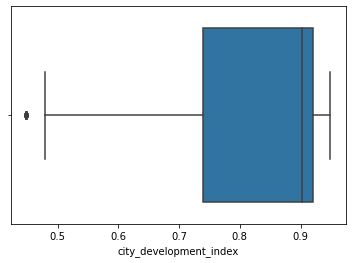

skewness of the  city_development_index column is  -0.9954275351977435


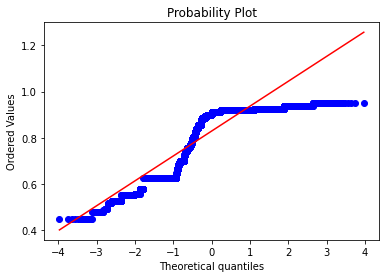

In [66]:
uni_num("city_development_index")

### BIVARIATE ANALYSIS

#### NUM VS NUM

In [67]:
def binum(x,y):
    sns.scatterplot(x=x,y=y,data=hr)
    plt.show()

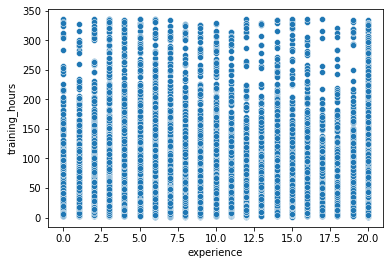

In [68]:
binum("experience","training_hours")

#### NUM VS CAT

In [69]:
def catvnum(x,y):
    sns.boxplot(x=x,y=y,data=hr)
    plt.show()

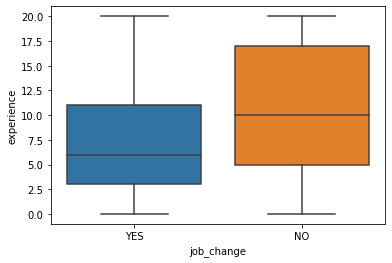

In [70]:
catvnum("job_change","experience")

In [71]:
hr.groupby("job_change")["experience"].describe()

,count,mean,std,min,25%,50%,75%,max
job_change,,,,,,,,
NO,14381.0,10.588068,6.491032,0.0,5.0,10.0,17.0,20.0
YES,4777.0,7.915637,6.091035,0.0,3.0,6.0,11.0,20.0


In [72]:
hr.groupby("job_change")["experience"].skew()

job_change
NO     0.208524
YES    0.798224
Name: experience, dtype: float64

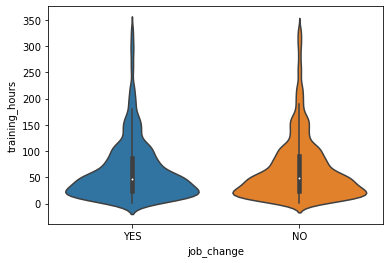

In [73]:
sns.violinplot(x="job_change",y="training_hours",data=hr)
plt.show()

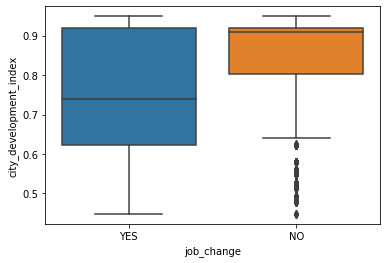

In [74]:
catvnum("job_change","city_development_index")

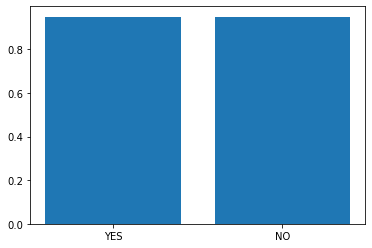

In [75]:
plt.bar(hr["job_change"], hr["city_development_index"])
plt.show()

In [76]:
hr.groupby("job_change")["city_development_index"].describe()

,count,mean,std,min,25%,50%,75%,max
job_change,,,,,,,,
NO,14381.0,0.853139,0.105354,0.448,0.804,0.91,0.92,0.949
YES,4777.0,0.755719,0.143166,0.448,0.624,0.74,0.92,0.949


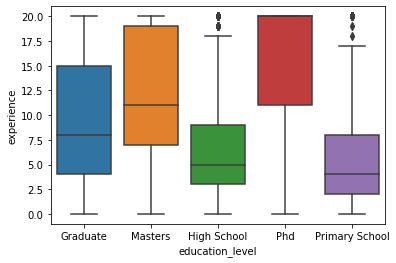

In [77]:
catvnum("education_level","experience")

In [78]:
hr.groupby("education_level")["experience"].describe()

,count,mean,std,min,25%,50%,75%,max
education_level,,,,,,,,
Graduate,11598.0,9.811433,6.384456,0.0,4.0,8.0,15.0,20.0
High School,2247.0,6.512239,5.479965,0.0,3.0,5.0,9.0,20.0
Masters,4361.0,11.860812,6.298473,0.0,7.0,11.0,19.0,20.0
Phd,414.0,15.917874,5.580407,0.0,11.0,20.0,20.0,20.0
Primary School,538.0,6.206320,5.746037,0.0,2.0,4.0,8.0,20.0


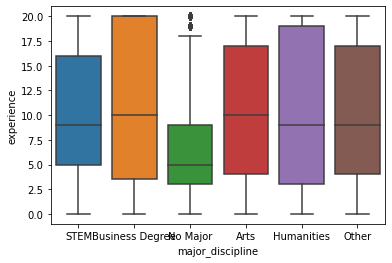

In [79]:
catvnum("major_discipline","experience")

In [80]:
hr.groupby("major_discipline")["experience"].describe()

,count,mean,std,min,25%,50%,75%,max
major_discipline,,,,,,,,
Arts,253.0,10.288538,6.890855,0.0,4.0,10.0,17.0,20.0
Business Degree,327.0,10.727829,7.460073,0.0,3.5,10.0,20.0,20.0
Humanities,669.0,10.168909,7.397393,0.0,3.0,9.0,19.0,20.0
No Major,3036.0,6.798419,5.789004,0.0,3.0,5.0,9.0,20.0
Other,381.0,10.149606,6.822654,0.0,4.0,9.0,17.0,20.0
STEM,14492.0,10.534019,6.366014,0.0,5.0,9.0,16.0,20.0


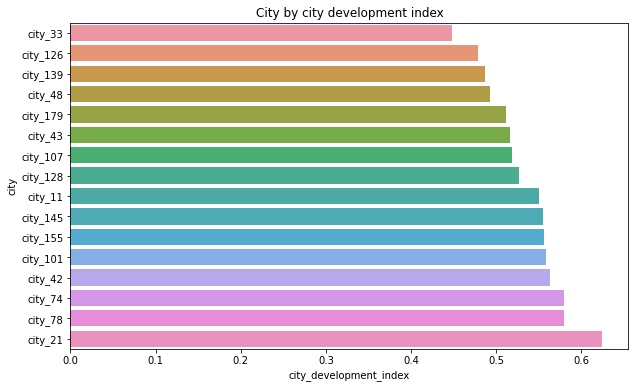

In [81]:
cdi = hr.sort_values(by='city_development_index', ascending=True)[0:2000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=cdi.city, x=hr.city_development_index)
plt.xticks()
plt.xlabel('city_development_index')
plt.ylabel('city')
plt.title('City by city development index')
plt.show()

##### CAT VS CAT

In [82]:
def crosstab(x,y):
    print(pd.crosstab(x,y,normalize="index")*100)
    pd.crosstab(x,y,normalize="index").plot(kind='bar')

job_change         NO        YES
gender                          
Female      71.906355  28.093645
Male        75.703832  24.296168
Other       69.794721  30.205279


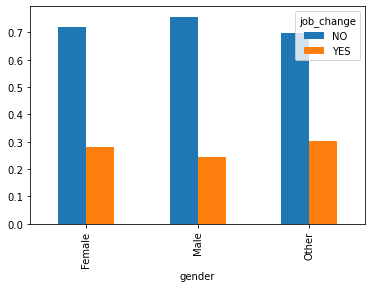

In [83]:
crosstab(hr.gender,hr.job_change)

job_change                      NO        YES
relevent_experience                          
Has relevent experience  78.531032  21.468968
No relevent experience   66.157287  33.842713


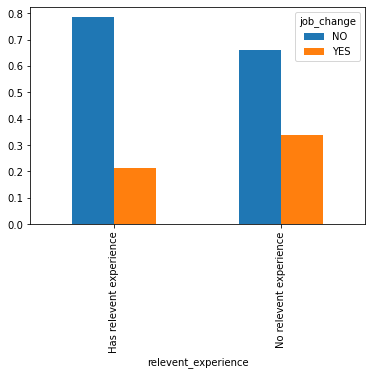

In [84]:
crosstab(hr.relevent_experience,hr.job_change)

job_change                  NO        YES
enrolled_university                      
Full time course     61.911099  38.088901
Part time course     74.791319  25.208681
no_enrollment        78.567908  21.432092


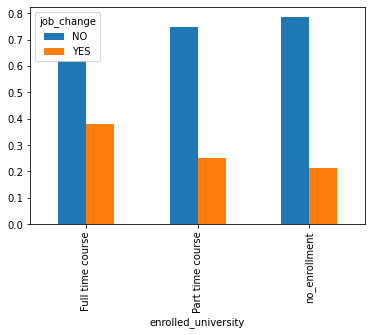

In [85]:
crosstab(hr.enrolled_university,hr.job_change)

job_change               NO        YES
major_discipline                      
Arts              79.051383  20.948617
Business Degree   73.700306  26.299694
Humanities        78.923767  21.076233
No Major          80.105402  19.894598
Other             73.228346  26.771654
STEM              73.840740  26.159260


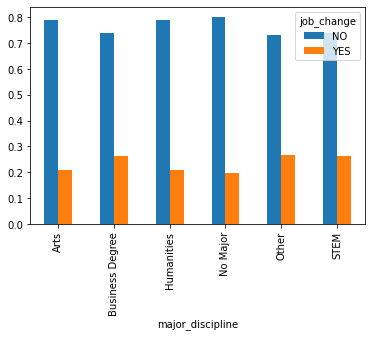

In [86]:
crosstab(hr.major_discipline,hr.job_change,)

job_change              NO        YES
education_level                      
Graduate         72.021038  27.978962
High School      79.839786  20.160214
Masters          78.559963  21.440037
Phd              85.990338  14.009662
Primary School   84.014870  15.985130


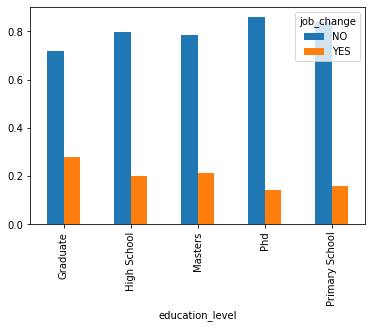

In [87]:
crosstab(hr.education_level,hr.job_change)

<Figure size 1440x1440 with 0 Axes>

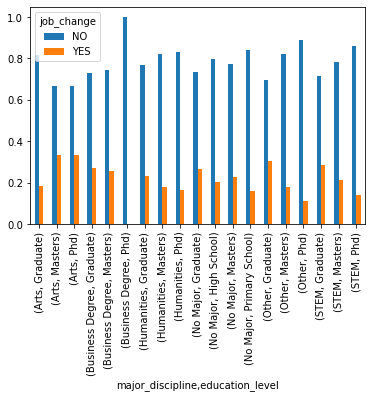

In [88]:
plt.figure(figsize=[20,20])
hr.groupby(["major_discipline","education_level"])["job_change"].value_counts(normalize=True).unstack().plot(kind="bar")
plt.show()

job_change           NO        YES
company_size                      
100-500       83.634963  16.365037
1000-4999     82.566918  17.433082
10000+        80.931154  19.068846
49            76.614548  23.385452
50-99         67.403814  32.596186
500-999       82.668187  17.331813
5000-9999     81.882771  18.117229
<10           82.761251  17.238749


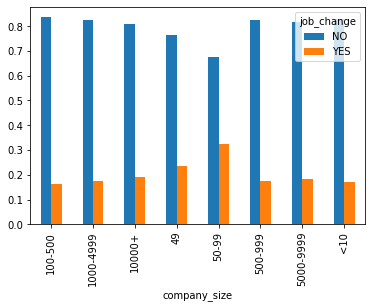

In [89]:
crosstab(hr.company_size,hr.job_change)

job_change                  NO        YES
company_type                             
Early Stage Startup  76.451078  23.548922
Funded Startup       86.013986  13.986014
NGO                  81.381958  18.618042
Other                61.459831  38.540169
Public Sector        78.010471  21.989529
Pvt Ltd              81.919120  18.080880


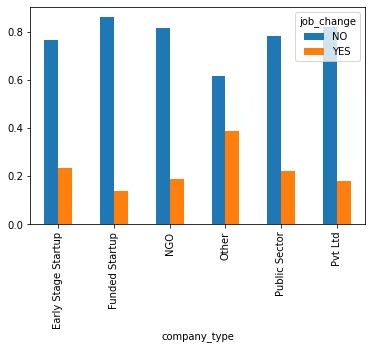

In [90]:
crosstab(hr.company_type,hr.job_change)

job_change           NO        YES
last_new_job                      
1             73.569652  26.430348
2             75.862069  24.137931
3             77.441406  22.558594
4             77.842566  22.157434
>4            81.762918  18.237082
never         68.939130  31.060870


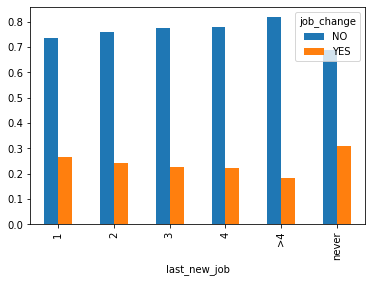

In [91]:
crosstab(hr.last_new_job,hr.job_change)

In [92]:
hr.groupby(["major_discipline"])["training_hours"].mean()

major_discipline
Arts               60.272727
Business Degree    66.189602
Humanities         65.635277
No Major           66.324111
Other              66.049869
STEM               65.206390
Name: training_hours, dtype: float64

In [93]:
hr.groupby(["education_level",])["training_hours"].mean()

education_level
Graduate          65.773409
High School       67.120605
Masters           63.270809
Phd               67.524155
Primary School    64.609665
Name: training_hours, dtype: float64

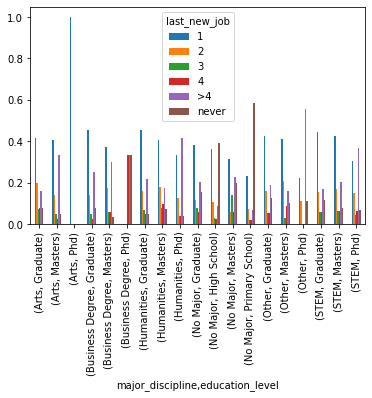

In [94]:
pd.crosstab([hr.major_discipline,hr.education_level],hr.last_new_job,normalize="index").plot.bar()
plt.show()

* 1.The percentage ratio for job change of Yes to No is 24:75.
* 2.The no. of employess working in diff sectors are mostly males then female followed by others.
* 3.The gender looking for job change in increasing order is given by : other> female> male
* 4.People with no relevant experience are more likely to look for job.
* 5.The max no. of candidates have graduate degree followed by masters and lowest level of education is primary school.
* 6.Candidates with no major followed by stem and other as major discipline are enrolled in full time courses more lieky to pursure some form of higher education to upskill themseleves.
* 7.The 30% graduates with other as major discipline are actively looking for job change followed by 28% of graduates with stem as major dicipline as compare to other education level.
* 8.Highly educated individuals and those with less education are likely to be more steady in their current work compared to graduates, post graduates, high schools.  
* 9.On an average employees with 8 years of experience are willing for job change.
* 10.All major discipline have a avg mean training time of 65-68 hrs
*  => graduates are the ones that require the highest traing time 
*  => we can also seee that phd as education level requires less training time as comapred to the rest

In [95]:
hr.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Other,1,36,YES
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,NO
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,Other,never,83,NO
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,50-99,Pvt Ltd,never,52,YES
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4,8,NO


# STATISTICS

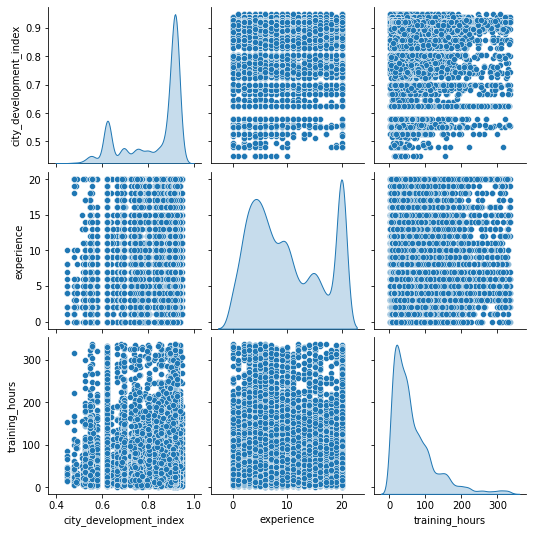

In [96]:
sns.pairplot(hr, diag_kind="kde")
plt.show()

In [97]:
hr.std()

city_development_index     0.123362
experience                 6.497186
training_hours            60.058462
dtype: float64

In [98]:
hr.describe(include="object")

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job,job_change
count,19158,19158,19158,19158,19158,19158,19158,19158,19158,19158
unique,123,3,2,3,5,6,8,6,6,2
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd,1,NO
freq,4355,16126,13792,14203,11598,14492,8863,9817,8040,14381


In [99]:
hr.drop("city",inplace=True, axis=1)

### Independance of attributes of categorical columns

H0: Cat columns are independant

H1: Cat columsn are dependant

In [100]:
from scipy.stats import chi2_contingency

In [101]:
cat= hr.drop("job_change", axis=1).select_dtypes(include="object").columns
cat

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job'],
      dtype='object')

In [102]:
for i in cat:
    obs= pd.crosstab(hr[i],hr.job_change)
    sts, pvalue, ddof, exp= chi2_contingency(obs)
    print(i,"is", pvalue)

gender is 1.0541322646977614e-05
relevent_experience is 1.5006628411178982e-70
enrolled_university is 2.267945402973493e-96
education_level is 3.9147580257452785e-34
major_discipline is 6.56029585540239e-12
company_size is 1.5236345116667286e-113
company_type is 3.2029488094685203e-202
last_new_job is 1.5317467805104205e-31


H0: mu1 = mu2

H1: mu1 <> mu2

In [103]:
y=hr[hr["job_change"]=="YES"]["training_hours"]
n=hr[hr["job_change"]=="NO"]["training_hours"]
from scipy import stats
stats, pvalue= stats.ttest_ind(y,n)
if pvalue<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

reject null hypothesis


H0: mu=8
    
H1: mu<>8

In [104]:
samp=hr.loc[hr.job_change=="YES","experience"]

In [105]:
samp.mean()

7.915637429348964

In [106]:
from scipy import stats
t_stat, p_val = stats.ttest_1samp(samp, popmean = 8)
if p_val<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

fail to reject null hypothesis


In [107]:
hr.gender.value_counts()

Male      16126
Female     2691
Other       341
Name: gender, dtype: int64

In [108]:
hr.select_dtypes(include="object").columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job', 'job_change'],
      dtype='object')

In [109]:
hr.corr()

,city_development_index,experience,training_hours
city_development_index,1.000000,0.333866,0.001920
experience,0.333866,1.000000,0.001326
training_hours,0.001920,0.001326,1.000000


In [110]:
from scipy import stats

In [111]:
z= stats.zscore(hr.training_hours)

In [112]:
hr[z>3]["training_hours"].min()

246

# FEATURE ENGINEERING

In [113]:
encode=pd.get_dummies(hr[['gender', 'relevent_experience',
       'enrolled_university', 'major_discipline', 'company_type']],drop_first=True)
len(encode.columns)

15

In [114]:
hr.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Other,1,36,YES
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,NO
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,50-99,Other,never,83,NO
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0.0,50-99,Pvt Ltd,never,52,YES
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4,8,NO


## dummy encoding

In [117]:
encode=pd.get_dummies(hr[['gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_new_job']],drop_first=True)

In [118]:
hr=pd.concat([hr,encode],axis=1)
hr.head(2)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Other,1,...,0,0,1,0,0,0,0,0,0,0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,...,0,0,0,0,1,0,0,0,1,0


In [119]:
hr.drop(['gender', 'relevent_experience',
             'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_new_job'],axis=1,inplace=True)

In [120]:
hr.job_change.replace({"YES":1,"NO":0},inplace=True)

In [121]:
hr.head(2)

,city_development_index,experience,training_hours,job_change,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,20.0,36,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0.776,15.0,47,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [122]:
hr.shape

(19158, 35)

## Correaltion matrix after dummy encoding

<AxesSubplot:>

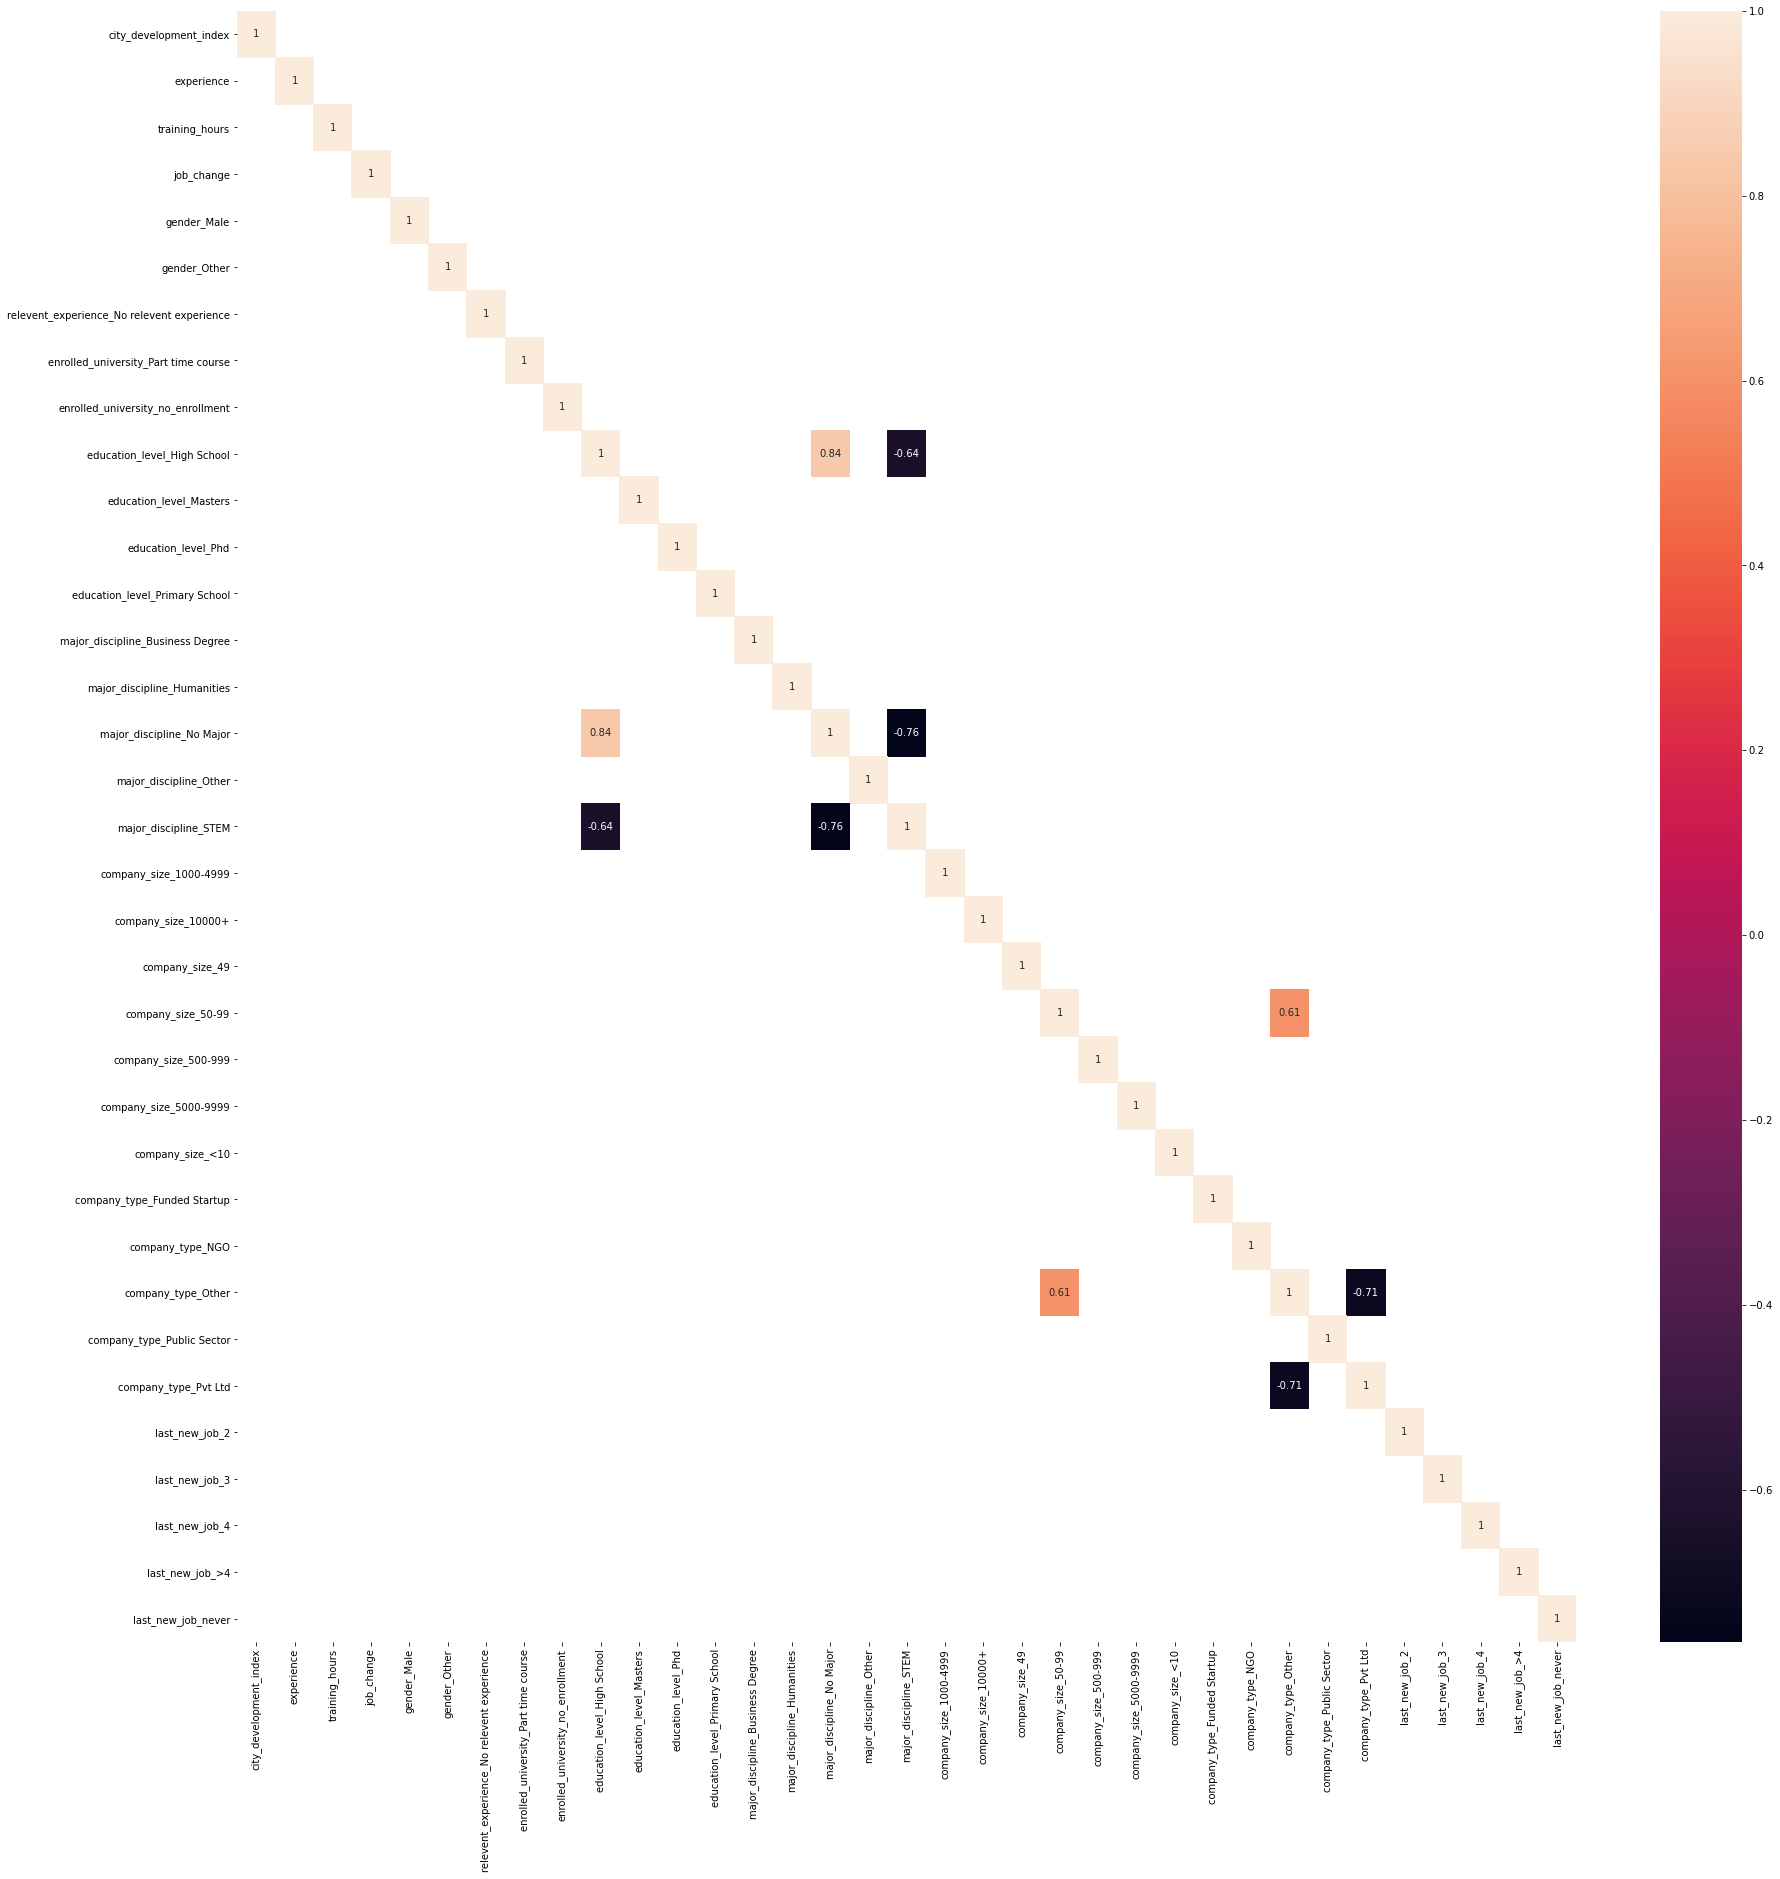

In [133]:
pd.options.display.max_columns=None
plt.figure(figsize=(30,30))
sns.heatmap(hr.corr()[(hr.corr()>0.5) | (hr.corr()<-0.5)],annot=True)

In [127]:
#job change correlation
hr.corr()["job_change"]

city_development_index                       -0.341665
experience                                   -0.177957
training_hours                               -0.021577
job_change                                    1.000000
gender_Male                                  -0.034040
gender_Other                                  0.016400
relevent_experience_No relevent experience    0.128430
enrolled_university_Part time course          0.001635
enrolled_university_no_enrollment            -0.137071
education_level_High School                  -0.040228
education_level_Masters                      -0.043853
education_level_Phd                          -0.037529
education_level_Primary School               -0.035163
major_discipline_Business Degree              0.004157
major_discipline_Humanities                  -0.016965
major_discipline_No Major                    -0.050555
major_discipline_Other                        0.006048
major_discipline_STEM                         0.049881
company_si

# MACHINE LEARNING

In [572]:
# all libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [573]:
hr.head(2)

,city_development_index,experience,training_hours,job_change,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,20.0,36,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0.776,15.0,47,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [574]:
#dataframe for all the data collected 
Score=pd.DataFrame(columns=["Name","Train Score","Test Score","Precision Score","Recall Score","F1-Score","ROC - AUC","TN","FP","FN","TP"])
CV_Score=pd.DataFrame(columns=["Name","CV-Train Score","CV-Test Score","CV-Precision Score","CV-Recall Score","CV-F1-Score","CV-ROC - AUC"])

Score.head(1)

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP


# Logistic Regression

In [575]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
lr=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
proba=lr.predict_proba(X_test)[:,1]
print("trian score : ",lr.score(X_train,y_train))
print("test score : ",lr.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("f1 score : ",f1_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr0,tpr0,thresh=roc_curve(y_test,proba)

trian score :  0.7693462090565053
test score :  0.7713987473903967

confusion matrix : 
  [[2718  185]
 [ 691  238]]

precision score : 0.5626477541371159
recall score :  0.25618945102260493
f1 score :  0.35207100591715973
auc :  0.7651851931504732

classification report : 
               precision    recall  f1-score   support

           0       0.80      0.94      0.86      2903
           1       0.56      0.26      0.35       929

    accuracy                           0.77      3832
   macro avg       0.68      0.60      0.61      3832
weighted avg       0.74      0.77      0.74      3832



In [576]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [577]:
Score = Score.append({"Name":"Logistic Regression",
             'Train Score':lr.score(X_train,y_train),
             'Test Score':lr.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [578]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.769346,0.771399,0.562648,0.256189,0.352071,0.765185,2718,185,691,238


#### impt features

In [579]:
ser=pd.Series(np.exp(lr.coef_).tolist()[0],index=X_train.columns).sort_values(ascending=False)
ser

company_type_Other                            3.020297
company_type_Public Sector                    2.034815
major_discipline_STEM                         1.906803
company_size_49                               1.893440
company_size_50-99                            1.744697
major_discipline_Business Degree              1.650225
major_discipline_Other                        1.643493
company_size_<10                              1.445917
company_size_1000-4999                        1.401502
major_discipline_Humanities                   1.383766
last_new_job_4                                1.381413
relevent_experience_No relevent experience    1.359514
last_new_job_3                                1.347269
company_size_10000+                           1.295410
gender_Other                                  1.270986
company_size_5000-9999                        1.215775
company_type_Pvt Ltd                          1.161182
last_new_job_>4                               1.140262
company_si

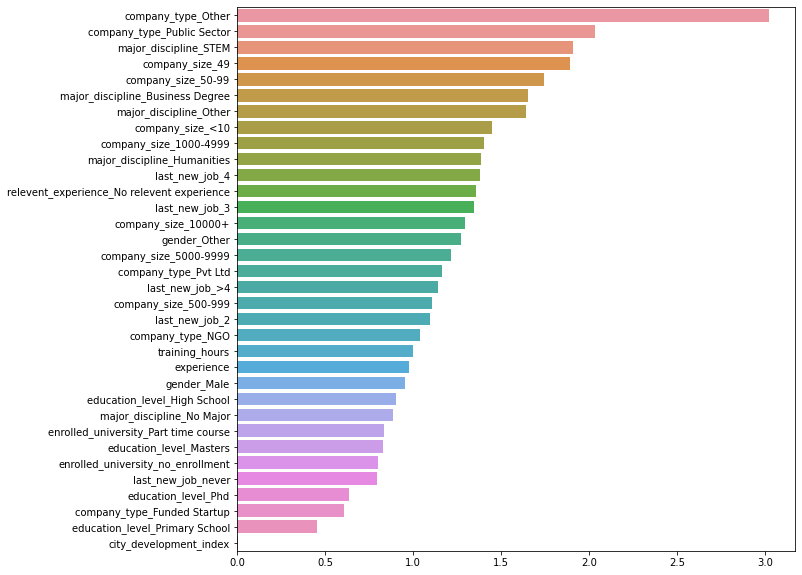

In [580]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# Logistic Regression (power transformer)

In [581]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
pipe=Pipeline((
("pt",PowerTransformer()),
("lr",LogisticRegression())
))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
proba=pipe.predict_proba(X_test)[:,1]
print("trian score : ",pipe.score(X_train,y_train))
print("test score : ",pipe.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr1,tpr1,thresh=roc_curve(y_test,proba)

trian score :  0.7653007960328853
test score :  0.7687891440501043

confusion matrix : 
  [[2721  182]
 [ 704  225]]

precision score : 0.5528255528255528
recall score :  0.24219590958019377
auc :  0.7544787749727743

classification report : 
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      2903
           1       0.55      0.24      0.34       929

    accuracy                           0.77      3832
   macro avg       0.67      0.59      0.60      3832
weighted avg       0.74      0.77      0.73      3832



In [582]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [583]:
Score = Score.append({"Name":"LR Pipeline (Transformed)",
             'Train Score':pipe.score(X_train,y_train),
             'Test Score':pipe.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [584]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.769346,0.771399,0.562648,0.256189,0.352071,0.765185,2718,185,691,238
1,LR Pipeline (Transformed),0.765301,0.768789,0.552826,0.242196,0.336826,0.754479,2721,182,704,225


In [585]:
ser=pd.Series(np.exp(pipe.steps[1][1].coef_).tolist()[0],index=X_train.columns).sort_values(ascending=False)
ser

company_type_Other                            1.452297
company_size_50-99                            1.218866
relevent_experience_No relevent experience    1.127176
company_size_49                               1.080568
company_size_10000+                           1.072604
last_new_job_>4                               1.063430
company_type_Public Sector                    1.049200
last_new_job_4                                1.045353
last_new_job_2                                1.036420
company_size_1000-4999                        1.032549
last_new_job_3                                1.030861
company_size_5000-9999                        1.028352
major_discipline_Business Degree              1.015025
gender_Other                                  1.008890
company_size_500-999                          1.001789
company_size_<10                              0.999863
company_type_NGO                              0.986379
major_discipline_Other                        0.986202
major_disc

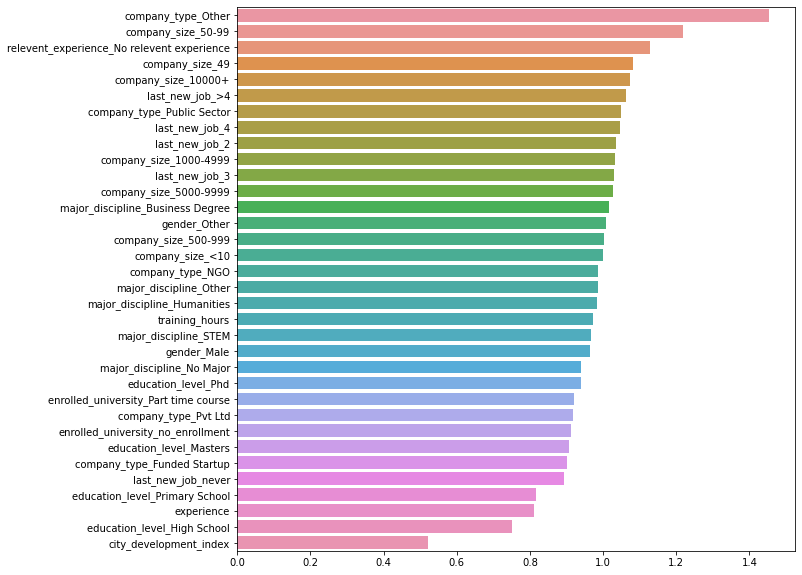

In [586]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

In [587]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
pt=PowerTransformer()
X_train_pt=pt.fit_transform(X_train)
X_test_pt=pt.transform(X_test)
lr=LogisticRegression()
lr.fit(X_train_pt,y_train)
print(lr.score(X_train_pt,y_train))
print(np.exp(lr.coef_))


0.7653007960328853
[[0.52009796 0.81018292 0.97134981 0.96394113 1.00889018 1.1271762
  0.92051501 0.91185708 0.75188102 0.90615286 0.93903486 0.81674336
  1.01502528 0.98336792 0.94034196 0.98620231 0.9672529  1.0325488
  1.0726036  1.0805677  1.21886567 1.0017893  1.0283518  0.99986316
  0.90193081 0.98637941 1.4522968  1.04920039 0.9174187  1.0364205
  1.03086115 1.04535254 1.06343013 0.89344426]]


In [588]:
-0.63176294-(-6.53738110e-01)

0.021975170000000044

In [589]:
0.531654-0.52009796

0.01155603999999999

# Decision tree 

In [590]:
from sklearn.tree import DecisionTreeClassifier

In [591]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
dt=DecisionTreeClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
proba=dt.predict_proba(X_test)[:,1]
print("trian score : ",dt.score(X_train,y_train))
print("test score : ",dt.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr2,tpr2,thresh=roc_curve(y_test,proba)

trian score :  0.9978467962938797
test score :  0.7142484342379958

confusion matrix : 
  [[2325  578]
 [ 517  412]]

precision score : 0.4161616161616162
recall score :  0.4434876210979548
auc :  0.6232335652179717

classification report : 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      2903
           1       0.42      0.44      0.43       929

    accuracy                           0.71      3832
   macro avg       0.62      0.62      0.62      3832
weighted avg       0.72      0.71      0.72      3832



In [592]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [593]:
Score = Score.append({"Name":"Decision Tree ",
             'Train Score':dt.score(X_train,y_train),
             'Test Score':dt.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [594]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.769346,0.771399,0.562648,0.256189,0.352071,0.765185,2718,185,691,238
1,LR Pipeline (Transformed),0.765301,0.768789,0.552826,0.242196,0.336826,0.754479,2721,182,704,225
2,Decision Tree,0.997847,0.714248,0.416162,0.443488,0.429390,0.623234,2325,578,517,412


In [595]:
ser=pd.Series(dt.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

city_development_index                        0.245633
training_hours                                0.245069
experience                                    0.132413
company_type_Other                            0.060864
education_level_Masters                       0.026706
company_size_50-99                            0.025707
enrolled_university_no_enrollment             0.022039
relevent_experience_No relevent experience    0.021861
major_discipline_No Major                     0.020702
last_new_job_never                            0.017922
last_new_job_2                                0.017814
gender_Male                                   0.017223
last_new_job_>4                               0.014339
company_type_Pvt Ltd                          0.011383
major_discipline_STEM                         0.010649
company_size_10000+                           0.009987
last_new_job_3                                0.008910
company_size_49                               0.007910
last_new_j

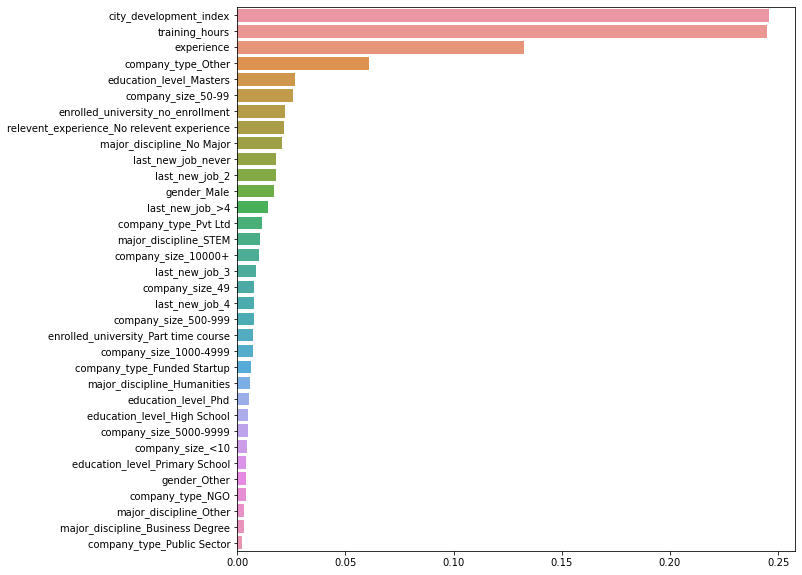

In [596]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# Decision Tree (power transformer )

In [597]:
from sklearn.tree import DecisionTreeClassifier

In [598]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
pipe=Pipeline((
("pt",PowerTransformer()),
("dt",DecisionTreeClassifier(random_state=10))
))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
proba=pipe.predict_proba(X_test)[:,1]
print("trian score : ",pipe.score(X_train,y_train))
print("test score : ",pipe.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr3,tpr3,thresh=roc_curve(y_test,proba)

trian score :  0.9978467962938797
test score :  0.7152922755741128

confusion matrix : 
  [[2323  580]
 [ 511  418]]

precision score : 0.4188376753507014
recall score :  0.44994617868675996
auc :  0.6262179320082748

classification report : 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      2903
           1       0.42      0.45      0.43       929

    accuracy                           0.72      3832
   macro avg       0.62      0.63      0.62      3832
weighted avg       0.72      0.72      0.72      3832



In [599]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [600]:
Score = Score.append({"Name":"Decision Tree Pipeline (Transformed)",
             'Train Score':pipe.score(X_train,y_train),
             'Test Score':pipe.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [601]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.769346,0.771399,0.562648,0.256189,0.352071,0.765185,2718,185,691,238
1,LR Pipeline (Transformed),0.765301,0.768789,0.552826,0.242196,0.336826,0.754479,2721,182,704,225
2,Decision Tree,0.997847,0.714248,0.416162,0.443488,0.429390,0.623234,2325,578,517,412
3,Decision Tree Pipeline (Transformed),0.997847,0.715292,0.418838,0.449946,0.433835,0.626218,2323,580,511,418


In [602]:
ser=pd.Series(pipe.steps[1][1].feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

city_development_index                        0.245633
training_hours                                0.245069
experience                                    0.132413
company_type_Other                            0.060864
education_level_Masters                       0.026706
company_size_50-99                            0.025707
enrolled_university_no_enrollment             0.022039
relevent_experience_No relevent experience    0.021861
major_discipline_No Major                     0.020702
last_new_job_never                            0.017922
last_new_job_2                                0.017814
gender_Male                                   0.017223
last_new_job_>4                               0.014339
company_type_Pvt Ltd                          0.011383
major_discipline_STEM                         0.010649
company_size_10000+                           0.009987
last_new_job_3                                0.008910
company_size_49                               0.007910
last_new_j

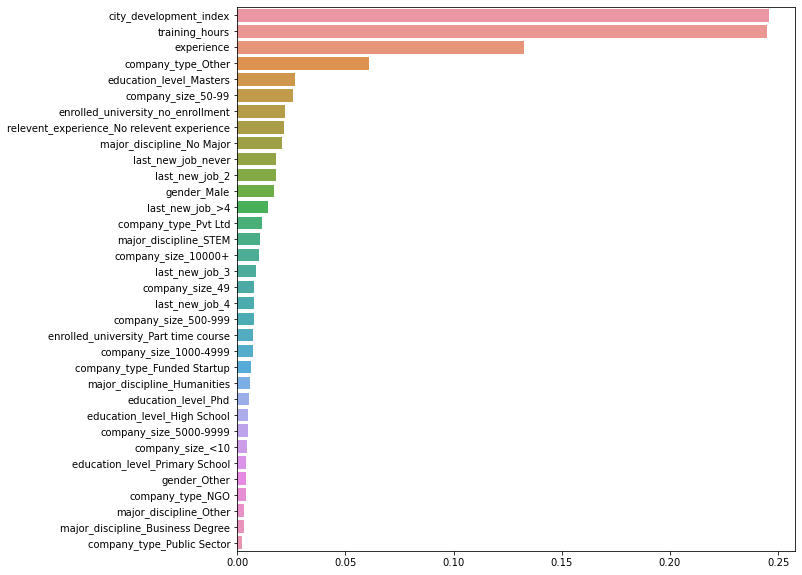

In [603]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# Random Forest Classifier

In [604]:
from sklearn.ensemble import RandomForestClassifier

In [605]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
rf=RandomForestClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
proba=rf.predict_proba(X_test)[:,1]
print("trian score : ",rf.score(X_train,y_train))
print("test score : ",rf.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr4,tpr4,thresh=roc_curve(y_test,proba)

trian score :  0.9978467962938797
test score :  0.7781837160751566

confusion matrix : 
  [[2578  325]
 [ 525  404]]

precision score : 0.5541838134430727
recall score :  0.43487621097954793
auc :  0.7712241929305901

classification report : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      2903
           1       0.55      0.43      0.49       929

    accuracy                           0.78      3832
   macro avg       0.69      0.66      0.67      3832
weighted avg       0.76      0.78      0.77      3832



In [606]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [607]:
Score = Score.append({"Name":"Random Forest Classifier ",
             'Train Score':rf.score(X_train,y_train),
             'Test Score':rf.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [608]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.769346,0.771399,0.562648,0.256189,0.352071,0.765185,2718,185,691,238
1,LR Pipeline (Transformed),0.765301,0.768789,0.552826,0.242196,0.336826,0.754479,2721,182,704,225
2,Decision Tree,0.997847,0.714248,0.416162,0.443488,0.429390,0.623234,2325,578,517,412
3,Decision Tree Pipeline (Transformed),0.997847,0.715292,0.418838,0.449946,0.433835,0.626218,2323,580,511,418
4,Random Forest Classifier,0.997847,0.778184,0.554184,0.434876,0.487334,0.771224,2578,325,525,404


In [609]:
ser=pd.Series(rf.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

training_hours                                0.253974
city_development_index                        0.252461
experience                                    0.147613
company_type_Other                            0.032382
company_size_50-99                            0.024416
education_level_Masters                       0.021133
relevent_experience_No relevent experience    0.021056
enrolled_university_no_enrollment             0.020971
gender_Male                                   0.020404
company_type_Pvt Ltd                          0.019385
last_new_job_2                                0.017635
last_new_job_never                            0.016552
last_new_job_>4                               0.012569
major_discipline_STEM                         0.011964
last_new_job_3                                0.009770
major_discipline_No Major                     0.009509
last_new_job_4                                0.009108
enrolled_university_Part time course          0.008813
company_si

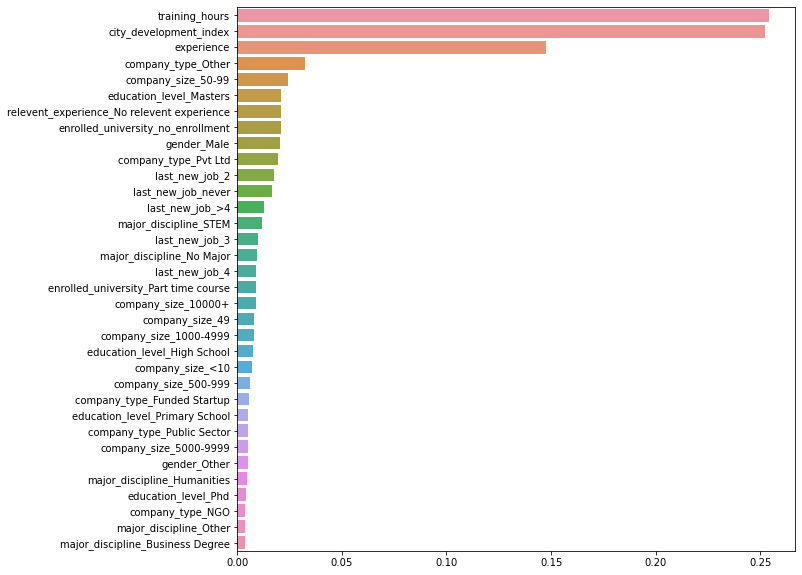

In [610]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# Random Forest (power transformer)

In [611]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
pipe=Pipeline((
("pt",PowerTransformer()),
("rf",RandomForestClassifier(random_state=10))
))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
proba=pipe.predict_proba(X_test)[:,1]
print("trian score : ",pipe.score(X_train,y_train))
print("test score : ",pipe.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr5,tpr5,thresh=roc_curve(y_test,proba)

trian score :  0.9978467962938797
test score :  0.7745302713987474

confusion matrix : 
  [[2574  329]
 [ 535  394]]

precision score : 0.5449515905947441
recall score :  0.4241119483315393
auc :  0.7713993949320086

classification report : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      2903
           1       0.54      0.42      0.48       929

    accuracy                           0.77      3832
   macro avg       0.69      0.66      0.67      3832
weighted avg       0.76      0.77      0.76      3832



In [612]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [613]:
Score = Score.append({"Name":"Random Forest Pipeline(Transformed) ",
             'Train Score':pipe.score(X_train,y_train),
             'Test Score':pipe.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [614]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.769346,0.771399,0.562648,0.256189,0.352071,0.765185,2718,185,691,238
1,LR Pipeline (Transformed),0.765301,0.768789,0.552826,0.242196,0.336826,0.754479,2721,182,704,225
2,Decision Tree,0.997847,0.714248,0.416162,0.443488,0.429390,0.623234,2325,578,517,412
3,Decision Tree Pipeline (Transformed),0.997847,0.715292,0.418838,0.449946,0.433835,0.626218,2323,580,511,418
4,Random Forest Classifier,0.997847,0.778184,0.554184,0.434876,0.487334,0.771224,2578,325,525,404
5,Random Forest Pipeline(Transformed),0.997847,0.774530,0.544952,0.424112,0.476998,0.771399,2574,329,535,394


In [615]:
ser=pd.Series(pipe.steps[1][1].feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

training_hours                                0.253974
city_development_index                        0.252461
experience                                    0.147613
company_type_Other                            0.032382
company_size_50-99                            0.024416
education_level_Masters                       0.021133
relevent_experience_No relevent experience    0.021056
enrolled_university_no_enrollment             0.020971
gender_Male                                   0.020404
company_type_Pvt Ltd                          0.019385
last_new_job_2                                0.017635
last_new_job_never                            0.016552
last_new_job_>4                               0.012569
major_discipline_STEM                         0.011964
last_new_job_3                                0.009770
major_discipline_No Major                     0.009509
last_new_job_4                                0.009108
enrolled_university_Part time course          0.008813
company_si

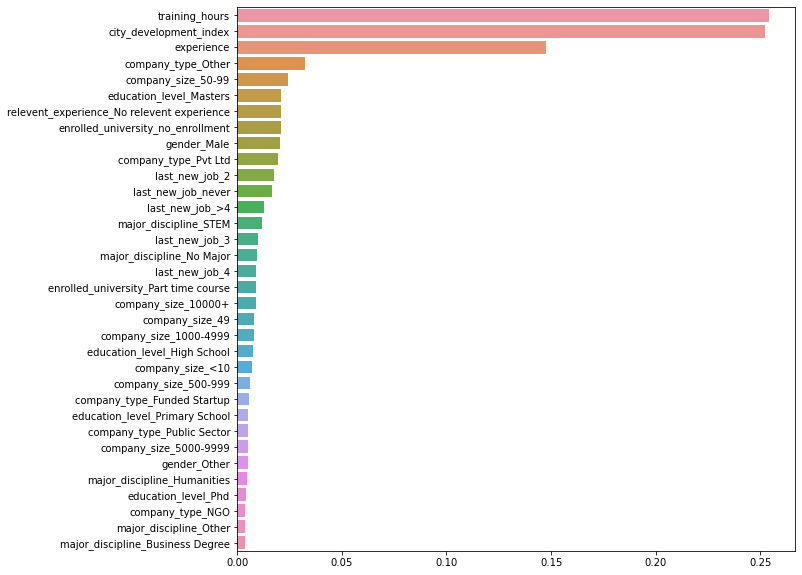

In [616]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# AdaBoost

In [617]:
from sklearn.ensemble import AdaBoostClassifier

In [618]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
ad=AdaBoostClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
ad.fit(X_train,y_train)
y_pred=ad.predict(X_test)
proba=ad.predict_proba(X_test)[:,1]
print("trian score : ",ad.score(X_train,y_train))
print("test score : ",ad.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr6,tpr6,thresh=roc_curve(y_test,proba)

trian score :  0.7765888033407282
test score :  0.778705636743215

confusion matrix : 
  [[2705  198]
 [ 650  279]]

precision score : 0.5849056603773585
recall score :  0.30032292787944026
auc :  0.7856432249478751

classification report : 
               precision    recall  f1-score   support

           0       0.81      0.93      0.86      2903
           1       0.58      0.30      0.40       929

    accuracy                           0.78      3832
   macro avg       0.70      0.62      0.63      3832
weighted avg       0.75      0.78      0.75      3832



In [619]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [620]:
Score = Score.append({"Name":"AdaBoost Classifier ",
             'Train Score':ad.score(X_train,y_train),
             'Test Score':ad.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [621]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.769346,0.771399,0.562648,0.256189,0.352071,0.765185,2718,185,691,238
1,LR Pipeline (Transformed),0.765301,0.768789,0.552826,0.242196,0.336826,0.754479,2721,182,704,225
2,Decision Tree,0.997847,0.714248,0.416162,0.443488,0.429390,0.623234,2325,578,517,412
3,Decision Tree Pipeline (Transformed),0.997847,0.715292,0.418838,0.449946,0.433835,0.626218,2323,580,511,418
4,Random Forest Classifier,0.997847,0.778184,0.554184,0.434876,0.487334,0.771224,2578,325,525,404
5,Random Forest Pipeline(Transformed),0.997847,0.774530,0.544952,0.424112,0.476998,0.771399,2574,329,535,394
6,AdaBoost Classifier,0.776589,0.778706,0.584906,0.300323,0.396871,0.785643,2705,198,650,279


In [622]:
ser=pd.Series(ad.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

city_development_index                        0.34
training_hours                                0.16
experience                                    0.06
company_type_Other                            0.06
enrolled_university_no_enrollment             0.04
major_discipline_No Major                     0.04
company_size_50-99                            0.04
company_size_49                               0.02
gender_Male                                   0.02
relevent_experience_No relevent experience    0.02
education_level_High School                   0.02
education_level_Masters                       0.02
education_level_Primary School                0.02
last_new_job_>4                               0.02
last_new_job_never                            0.02
company_type_Funded Startup                   0.02
last_new_job_4                                0.02
last_new_job_3                                0.02
last_new_job_2                                0.02
company_type_Public Sector     

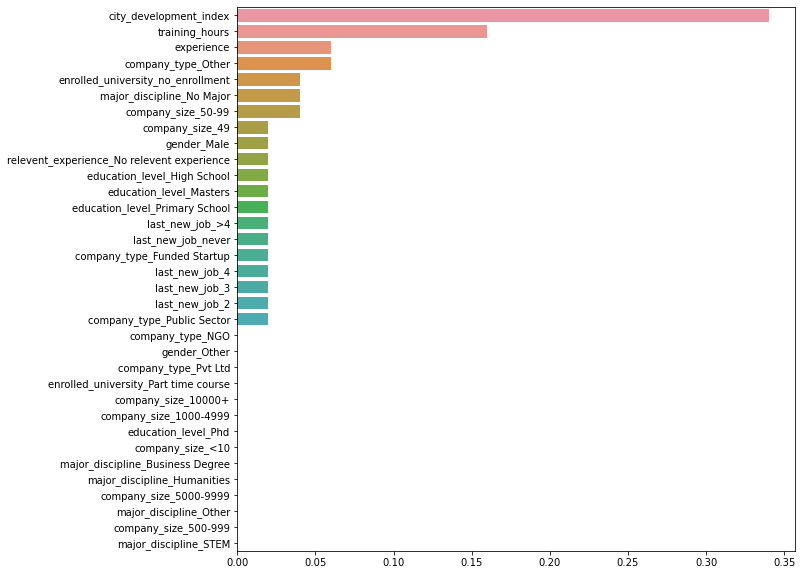

In [623]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# Gradiant Boost 

In [624]:
from sklearn.ensemble import GradientBoostingClassifier

In [625]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
gb=GradientBoostingClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
proba=gb.predict_proba(X_test)[:,1]
print("trian score : ",gb.score(X_train,y_train))
print("test score : ",gb.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr7,tpr7,thresh=roc_curve(y_test,proba)

trian score :  0.7992300665535691
test score :  0.7948851774530271

confusion matrix : 
  [[2582  321]
 [ 465  464]]

precision score : 0.5910828025477707
recall score :  0.49946178686759957
auc :  0.7947355599252027

classification report : 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      2903
           1       0.59      0.50      0.54       929

    accuracy                           0.79      3832
   macro avg       0.72      0.69      0.70      3832
weighted avg       0.79      0.79      0.79      3832



In [626]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [627]:
Score = Score.append({"Name":"Gradiant Boosting Classifier ",
             'Train Score':gb.score(X_train,y_train),
             'Test Score':gb.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [628]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.769346,0.771399,0.562648,0.256189,0.352071,0.765185,2718,185,691,238
1,LR Pipeline (Transformed),0.765301,0.768789,0.552826,0.242196,0.336826,0.754479,2721,182,704,225
2,Decision Tree,0.997847,0.714248,0.416162,0.443488,0.429390,0.623234,2325,578,517,412
3,Decision Tree Pipeline (Transformed),0.997847,0.715292,0.418838,0.449946,0.433835,0.626218,2323,580,511,418
4,Random Forest Classifier,0.997847,0.778184,0.554184,0.434876,0.487334,0.771224,2578,325,525,404
5,Random Forest Pipeline(Transformed),0.997847,0.774530,0.544952,0.424112,0.476998,0.771399,2574,329,535,394
6,AdaBoost Classifier,0.776589,0.778706,0.584906,0.300323,0.396871,0.785643,2705,198,650,279
7,Gradiant Boosting Classifier,0.799230,0.794885,0.591083,0.499462,0.541424,0.794736,2582,321,465,464


In [629]:
ser=pd.Series(gb.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

city_development_index                        0.588524
company_type_Other                            0.220136
major_discipline_No Major                     0.056608
company_size_50-99                            0.028634
experience                                    0.020375
training_hours                                0.018684
relevent_experience_No relevent experience    0.013880
last_new_job_never                            0.009947
enrolled_university_no_enrollment             0.009103
company_type_Public Sector                    0.006777
education_level_Primary School                0.003936
education_level_High School                   0.003502
company_size_49                               0.002125
company_type_Pvt Ltd                          0.002091
last_new_job_2                                0.002043
education_level_Phd                           0.001990
company_type_Funded Startup                   0.001829
education_level_Masters                       0.001352
major_disc

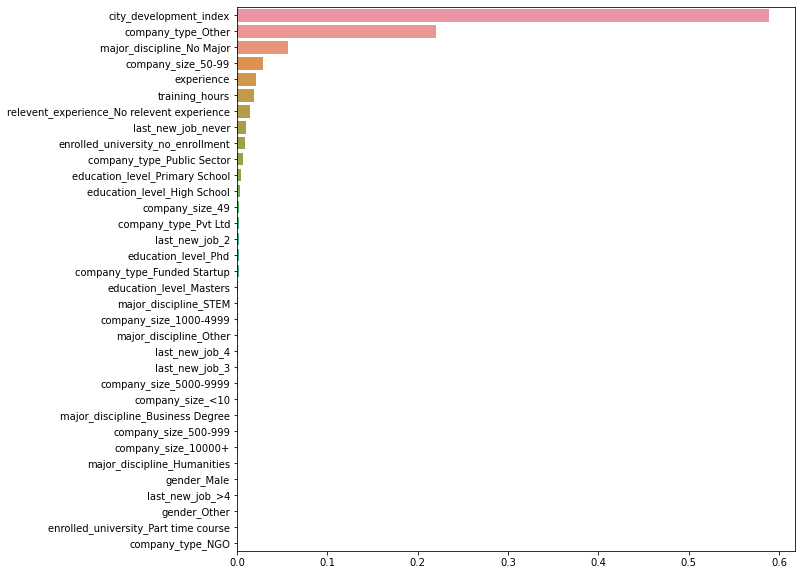

In [630]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# XGboost

In [631]:
from xgboost import XGBClassifier

In [632]:
hr.columns

Index(['city_development_index', 'experience', 'training_hours', 'job_change',
       'gender_Male', 'gender_Other',
       'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_High School',
       'education_level_Masters', 'education_level_Phd',
       'education_level_Primary School', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'company_size_1000-4999', 'company_size_10000+', 'company_size_49',
       'company_size_50-99', 'company_size_500-999', 'company_size_5000-9999',
       'company_size_<10', 'company_type_Funded Startup', 'company_type_NGO',
       'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'last_new_job_2', 'last_new_job_3',
       'last_new_job_4', 'last_new_job_>4', 'last_new_job_never'],
      dtype='object')

In [633]:
hr.columns=hr.rename(columns={"last_new_job_>4":"last_new_job_more_than_4",'company_size_<10':'company_size_less_than_10'}).columns

In [634]:
hr.columns

Index(['city_development_index', 'experience', 'training_hours', 'job_change',
       'gender_Male', 'gender_Other',
       'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_High School',
       'education_level_Masters', 'education_level_Phd',
       'education_level_Primary School', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'company_size_1000-4999', 'company_size_10000+', 'company_size_49',
       'company_size_50-99', 'company_size_500-999', 'company_size_5000-9999',
       'company_size_less_than_10', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'last_new_job_2', 'last_new_job_3',
       'last_new_job_4', 'last_new_job_more_than_4', 'last_new_job_never'],
      

In [635]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
xg=XGBClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
proba=xg.predict_proba(X_test)[:,1]
print("trian score : ",xg.score(X_train,y_train))
print("test score : ",xg.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr8,tpr8,thresh=roc_curve(y_test,proba)

[08:24:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
trian score :  0.8743312018791596
test score :  0.782098121085595

confusion matrix : 
  [[2534  369]
 [ 466  463]]

precision score : 0.5564903846153846
recall score :  0.4983853606027987
auc :  0.7859228065543719

classification report : 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      2903
           1       0.56      0.50      0.53       929

    accuracy                           0.78      3832
   macro avg       0.70      0.69      0.69      3832
weighted avg       0.77      0.78      0.78      3832



In [636]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [637]:
Score = Score.append({"Name":"XGBoost Classifier ",
             'Train Score':xg.score(X_train,y_train),
             'Test Score':xg.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [638]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.769346,0.771399,0.562648,0.256189,0.352071,0.765185,2718,185,691,238
1,LR Pipeline (Transformed),0.765301,0.768789,0.552826,0.242196,0.336826,0.754479,2721,182,704,225
2,Decision Tree,0.997847,0.714248,0.416162,0.443488,0.429390,0.623234,2325,578,517,412
3,Decision Tree Pipeline (Transformed),0.997847,0.715292,0.418838,0.449946,0.433835,0.626218,2323,580,511,418
4,Random Forest Classifier,0.997847,0.778184,0.554184,0.434876,0.487334,0.771224,2578,325,525,404
5,Random Forest Pipeline(Transformed),0.997847,0.774530,0.544952,0.424112,0.476998,0.771399,2574,329,535,394
6,AdaBoost Classifier,0.776589,0.778706,0.584906,0.300323,0.396871,0.785643,2705,198,650,279
7,Gradiant Boosting Classifier,0.799230,0.794885,0.591083,0.499462,0.541424,0.794736,2582,321,465,464
8,XGBoost Classifier,0.874331,0.782098,0.556490,0.498385,0.525838,0.785923,2534,369,466,463


In [639]:
ser=pd.Series(xg.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

company_type_Other                            0.189035
major_discipline_No Major                     0.118964
city_development_index                        0.078544
company_size_50-99                            0.039448
last_new_job_never                            0.028281
relevent_experience_No relevent experience    0.027481
company_type_Public Sector                    0.026635
education_level_Primary School                0.026048
major_discipline_STEM                         0.022063
gender_Other                                  0.021148
education_level_Phd                           0.020210
company_size_10000+                           0.019890
education_level_High School                   0.019852
enrolled_university_Part time course          0.019612
last_new_job_more_than_4                      0.019520
company_size_1000-4999                        0.019367
last_new_job_2                                0.019354
education_level_Masters                       0.019226
enrolled_u

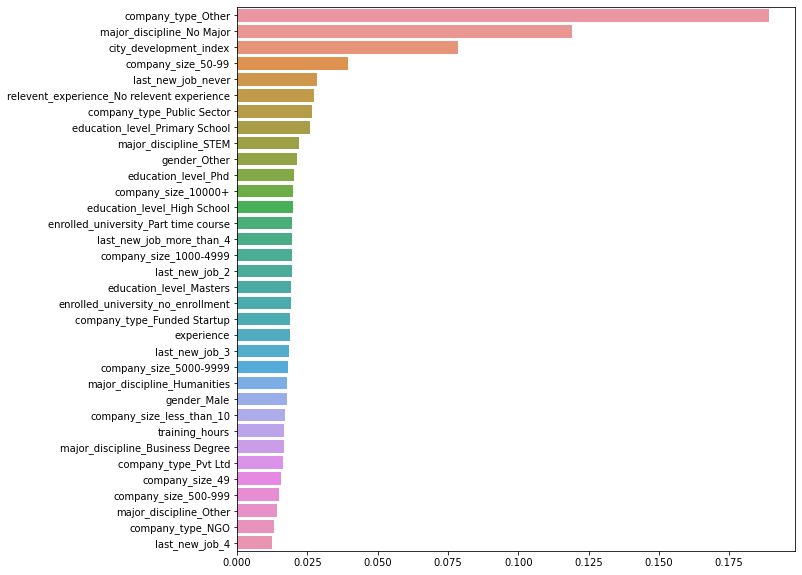

In [640]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# Light GBM Classifier

In [641]:
from lightgbm import LGBMClassifier

In [642]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
lgbm=LGBMClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
lgbm.fit(X_train,y_train)
y_pred=lgbm.predict(X_test)
proba=lgbm.predict_proba(X_test)[:,1]
print("trian score : ",lgbm.score(X_train,y_train))
print("test score : ",lgbm.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr9,tpr9,thresh=roc_curve(y_test,proba)

trian score :  0.8293749184392536
test score :  0.7881002087682673

confusion matrix : 
  [[2495  408]
 [ 404  525]]

precision score : 0.5627009646302251
recall score :  0.5651237890204521
auc :  0.7967187724216847

classification report : 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      2903
           1       0.56      0.57      0.56       929

    accuracy                           0.79      3832
   macro avg       0.71      0.71      0.71      3832
weighted avg       0.79      0.79      0.79      3832



In [643]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [644]:
Score = Score.append({"Name":"Light GBM Classifier ",
             'Train Score':lgbm.score(X_train,y_train),
             'Test Score':lgbm.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [645]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.769346,0.771399,0.562648,0.256189,0.352071,0.765185,2718,185,691,238
1,LR Pipeline (Transformed),0.765301,0.768789,0.552826,0.242196,0.336826,0.754479,2721,182,704,225
2,Decision Tree,0.997847,0.714248,0.416162,0.443488,0.429390,0.623234,2325,578,517,412
3,Decision Tree Pipeline (Transformed),0.997847,0.715292,0.418838,0.449946,0.433835,0.626218,2323,580,511,418
4,Random Forest Classifier,0.997847,0.778184,0.554184,0.434876,0.487334,0.771224,2578,325,525,404
5,Random Forest Pipeline(Transformed),0.997847,0.774530,0.544952,0.424112,0.476998,0.771399,2574,329,535,394
6,AdaBoost Classifier,0.776589,0.778706,0.584906,0.300323,0.396871,0.785643,2705,198,650,279
7,Gradiant Boosting Classifier,0.799230,0.794885,0.591083,0.499462,0.541424,0.794736,2582,321,465,464
8,XGBoost Classifier,0.874331,0.782098,0.556490,0.498385,0.525838,0.785923,2534,369,466,463
9,Light GBM Classifier,0.829375,0.788100,0.562701,0.565124,0.563910,0.796719,2495,408,404,525


In [646]:
ser=pd.Series(lgbm.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

training_hours                                870
city_development_index                        558
experience                                    520
relevent_experience_No relevent experience     90
company_size_50-99                             80
last_new_job_never                             70
enrolled_university_no_enrollment              68
company_type_Other                             68
education_level_Masters                        64
last_new_job_2                                 51
company_type_Pvt Ltd                           43
education_level_High School                    39
last_new_job_more_than_4                       36
major_discipline_STEM                          34
company_type_Public Sector                     32
company_size_1000-4999                         31
gender_Male                                    31
company_size_10000+                            30
major_discipline_No Major                      29
company_size_less_than_10                      28


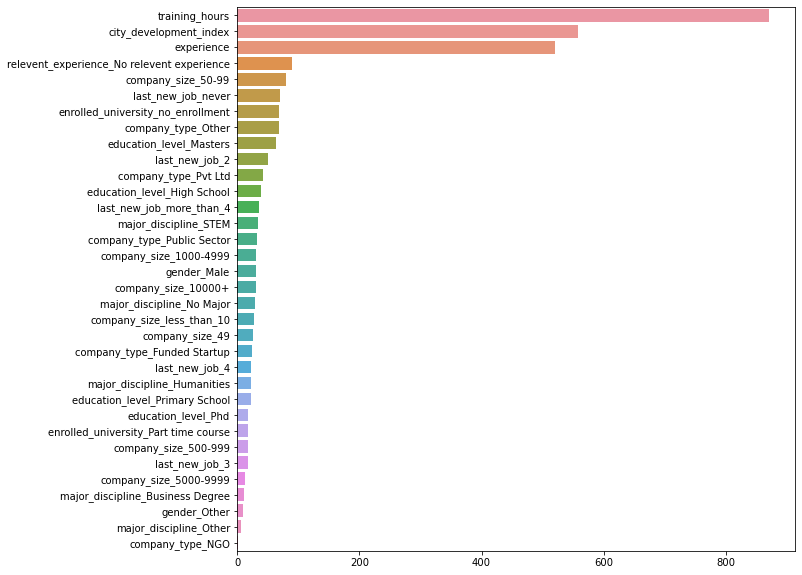

In [647]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# KNN

In [648]:
from sklearn.neighbors import KNeighborsClassifier

In [649]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
knn=KNeighborsClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
proba=knn.predict_proba(X_test)[:,1]
print("trian score : ",knn.score(X_train,y_train))
print("test score : ",knn.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr10,tpr10,thresh=roc_curve(y_test,proba)

trian score :  0.8063421636434817
test score :  0.7288622129436325

confusion matrix : 
  [[2561  342]
 [ 697  232]]

precision score : 0.40418118466898956
recall score :  0.24973089343379978
auc :  0.6340734706348468

classification report : 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83      2903
           1       0.40      0.25      0.31       929

    accuracy                           0.73      3832
   macro avg       0.60      0.57      0.57      3832
weighted avg       0.69      0.73      0.70      3832



In [650]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [651]:
Score = Score.append({"Name":"K Nearest Neighbor Classifier ",
             'Train Score':knn.score(X_train,y_train),
             'Test Score':knn.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [652]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.769346,0.771399,0.562648,0.256189,0.352071,0.765185,2718,185,691,238
1,LR Pipeline (Transformed),0.765301,0.768789,0.552826,0.242196,0.336826,0.754479,2721,182,704,225
2,Decision Tree,0.997847,0.714248,0.416162,0.443488,0.429390,0.623234,2325,578,517,412
3,Decision Tree Pipeline (Transformed),0.997847,0.715292,0.418838,0.449946,0.433835,0.626218,2323,580,511,418
4,Random Forest Classifier,0.997847,0.778184,0.554184,0.434876,0.487334,0.771224,2578,325,525,404
5,Random Forest Pipeline(Transformed),0.997847,0.774530,0.544952,0.424112,0.476998,0.771399,2574,329,535,394
6,AdaBoost Classifier,0.776589,0.778706,0.584906,0.300323,0.396871,0.785643,2705,198,650,279
7,Gradiant Boosting Classifier,0.799230,0.794885,0.591083,0.499462,0.541424,0.794736,2582,321,465,464
8,XGBoost Classifier,0.874331,0.782098,0.556490,0.498385,0.525838,0.785923,2534,369,466,463
9,Light GBM Classifier,0.829375,0.788100,0.562701,0.565124,0.563910,0.796719,2495,408,404,525


# Naive Bayes 

In [653]:
from sklearn.naive_bayes import GaussianNB

In [654]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
nb=GaussianNB()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
proba=nb.predict_proba(X_test)[:,1]
print("trian score : ",nb.score(X_train,y_train))
print("test score : ",nb.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr11,tpr11,thresh=roc_curve(y_test,proba)

trian score :  0.6731045282526426
test score :  0.6518789144050104

confusion matrix : 
  [[1903 1000]
 [ 334  595]]

precision score : 0.3730407523510972
recall score :  0.6404736275565124
auc :  0.683620411237104

classification report : 
               precision    recall  f1-score   support

           0       0.85      0.66      0.74      2903
           1       0.37      0.64      0.47       929

    accuracy                           0.65      3832
   macro avg       0.61      0.65      0.61      3832
weighted avg       0.73      0.65      0.68      3832



In [655]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [656]:
Score = Score.append({"Name":"Naive Bayes Classifier ",
             'Train Score':nb.score(X_train,y_train),
             'Test Score':nb.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [658]:
# this table represents all the scores of the models found above 
Score.sort_values(by="Recall Score",ascending=False)

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
11,Naive Bayes Classifier,0.673105,0.651879,0.373041,0.640474,0.471474,0.683620,1903,1000,334,595
9,Light GBM Classifier,0.829375,0.788100,0.562701,0.565124,0.563910,0.796719,2495,408,404,525
7,Gradiant Boosting Classifier,0.799230,0.794885,0.591083,0.499462,0.541424,0.794736,2582,321,465,464
8,XGBoost Classifier,0.874331,0.782098,0.556490,0.498385,0.525838,0.785923,2534,369,466,463
3,Decision Tree Pipeline (Transformed),0.997847,0.715292,0.418838,0.449946,0.433835,0.626218,2323,580,511,418
2,Decision Tree,0.997847,0.714248,0.416162,0.443488,0.429390,0.623234,2325,578,517,412
4,Random Forest Classifier,0.997847,0.778184,0.554184,0.434876,0.487334,0.771224,2578,325,525,404
5,Random Forest Pipeline(Transformed),0.997847,0.774530,0.544952,0.424112,0.476998,0.771399,2574,329,535,394
6,AdaBoost Classifier,0.776589,0.778706,0.584906,0.300323,0.396871,0.785643,2705,198,650,279
0,Logistic Regression,0.769346,0.771399,0.562648,0.256189,0.352071,0.765185,2718,185,691,238


# PLOT AUC ROC

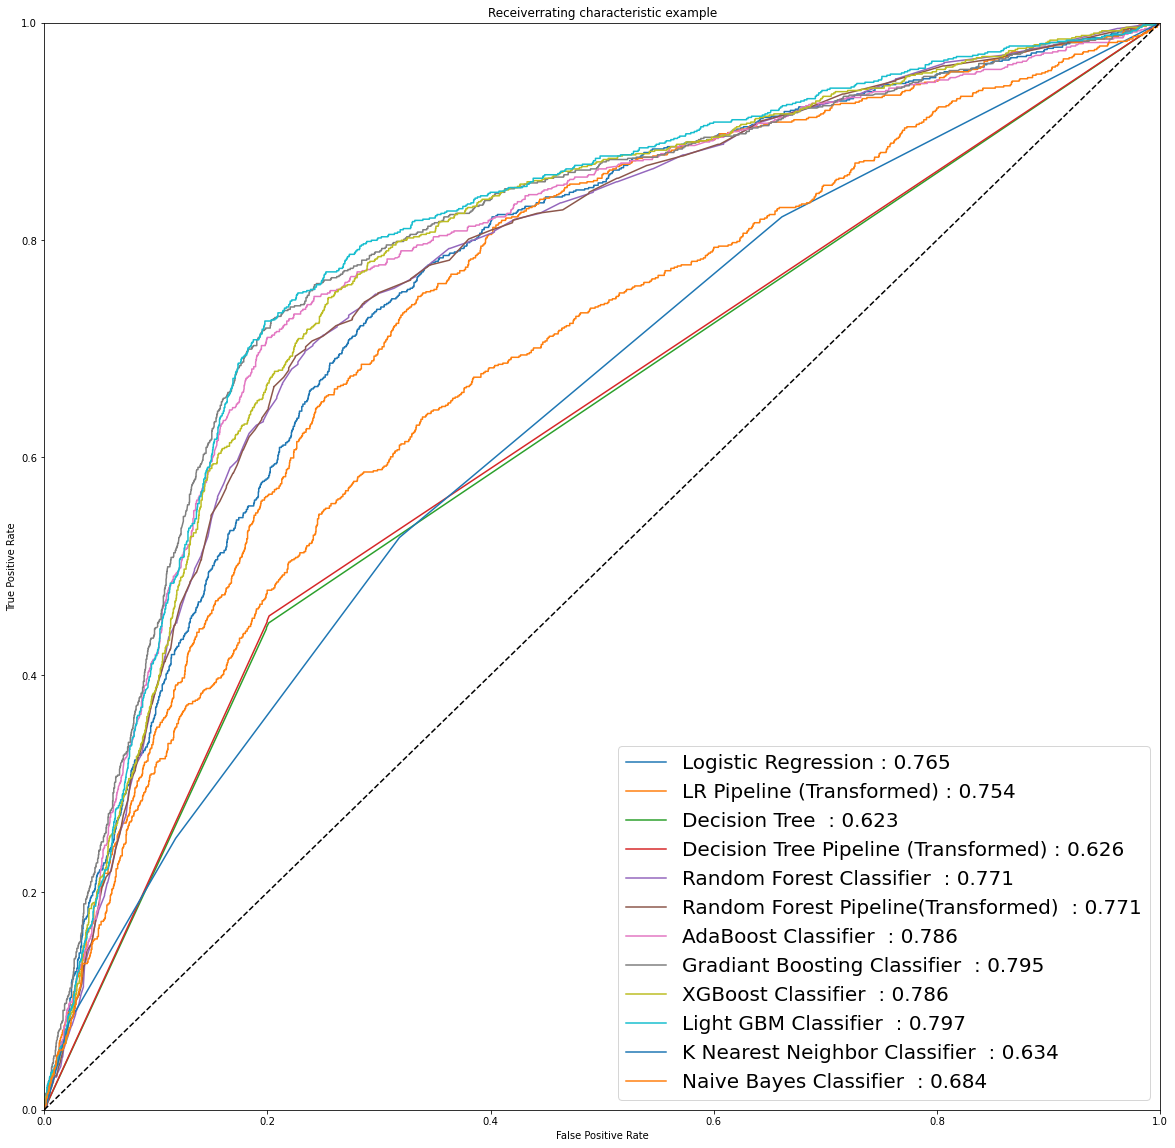

In [328]:
plt.figure(figsize=(20,20))
plt.plot(fpr0,tpr0,label="{0} : {1:.3f}".format(Score["Name"][0],auc(fpr0,tpr0)))
plt.plot(fpr1,tpr1,label="{0} : {1:.3f}".format(Score["Name"][1],auc(fpr1,tpr1)))
plt.plot(fpr2,tpr2,label="{0} : {1:.3f}".format(Score["Name"][2],auc(fpr2,tpr2)))
plt.plot(fpr3,tpr3,label="{0} : {1:.3f}".format(Score["Name"][3],auc(fpr3,tpr3)))
plt.plot(fpr4,tpr4,label="{0} : {1:.3f}".format(Score["Name"][4],auc(fpr4,tpr4)))
plt.plot(fpr5,tpr5,label="{0} : {1:.3f}".format(Score["Name"][5],auc(fpr5,tpr5)))
plt.plot(fpr6,tpr6,label="{0} : {1:.3f}".format(Score["Name"][6],auc(fpr6,tpr6)))
plt.plot(fpr7,tpr7,label="{0} : {1:.3f}".format(Score["Name"][7],auc(fpr7,tpr7)))
plt.plot(fpr8,tpr8,label="{0} : {1:.3f}".format(Score["Name"][8],auc(fpr8,tpr8)))
plt.plot(fpr9,tpr9,label="{0} : {1:.3f}".format(Score["Name"][9],auc(fpr9,tpr9)))
plt.plot(fpr10,tpr10,label="{0} : {1:.3f}".format(Score["Name"][10],auc(fpr10,tpr10)))
plt.plot(fpr11,tpr11,label="{0} : {1:.3f}".format(Score["Name"][11],auc(fpr11,tpr11)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right",prop={'size':20})
plt.show()

### Random Over Sampler 

In [332]:
from imblearn.over_sampling import RandomOverSampler


In [333]:
os=RandomOverSampler(random_state=10)
X=hr.drop("job_change",axis=1)
y=hr["job_change"]
X,y=os.fit_resample(X,y)

In [334]:
from  collections import Counter
Counter(y)

Counter({1: 14381, 0: 14381})

In [335]:
hr.shape#before over sampling

(19158, 35)

In [336]:
hr=pd.concat([X,y],axis=1)
hr.head(2)

,city_development_index,experience,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_more_than_4,last_new_job_never,job_change
0,0.920,20.0,36,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0.776,15.0,47,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [337]:
hr.shape#after over sampling

(28762, 35)

## Final Models after over sampling

In [338]:
# all libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [339]:
hr.head(2)

,city_development_index,experience,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_more_than_4,last_new_job_never,job_change
0,0.920,20.0,36,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0.776,15.0,47,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [340]:
#dataframe for all the data collected 
Score=pd.DataFrame(columns=["Name","Train Score","Test Score","Precision Score","Recall Score","F1-Score","ROC - AUC","TN","FP","FN","TP"])
CV_Score=pd.DataFrame(columns=["Name","CV-Train Score","CV-Test Score","CV-Precision Score","CV-Recall Score","CV-F1-Score","CV-ROC - AUC"])

Score.head(1)

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP


# 1 Logistic Regression

In [341]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
lr=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
proba=lr.predict_proba(X_test)[:,1]
print("trian score : ",lr.score(X_train,y_train))
print("test score : ",lr.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("f1 score : ",f1_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr0,tpr0,thresh=roc_curve(y_test,proba)

trian score :  0.7171976183232648
test score :  0.72066747783765

confusion matrix : 
  [[2058  795]
 [ 812 2088]]

precision score : 0.7242455775234131
recall score :  0.72
f1 score :  0.7221165485042366
auc :  0.7657050050158938

classification report : 
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      2853
           1       0.72      0.72      0.72      2900

    accuracy                           0.72      5753
   macro avg       0.72      0.72      0.72      5753
weighted avg       0.72      0.72      0.72      5753



In [342]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [343]:
Score = Score.append({"Name":"Logistic Regression",
             'Train Score':lr.score(X_train,y_train),
             'Test Score':lr.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [344]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.717198,0.720667,0.724246,0.72,0.722117,0.765705,2058,795,812,2088


#### impt features

In [345]:
ser=pd.Series(np.exp(lr.coef_).tolist()[0],index=X_train.columns).sort_values(ascending=False)
ser

company_type_Other                            3.463670
company_type_Public Sector                    2.083664
company_size_49                               1.941522
major_discipline_STEM                         1.902292
major_discipline_Business Degree              1.879036
company_size_50-99                            1.875826
major_discipline_Humanities                   1.705737
company_size_1000-4999                        1.573195
major_discipline_Other                        1.573026
relevent_experience_No relevent experience    1.457941
company_size_less_than_10                     1.428822
company_size_10000+                           1.422525
last_new_job_4                                1.408723
company_type_NGO                              1.306806
company_size_500-999                          1.275580
gender_Other                                  1.265303
last_new_job_3                                1.186706
company_size_5000-9999                        1.171764
company_ty

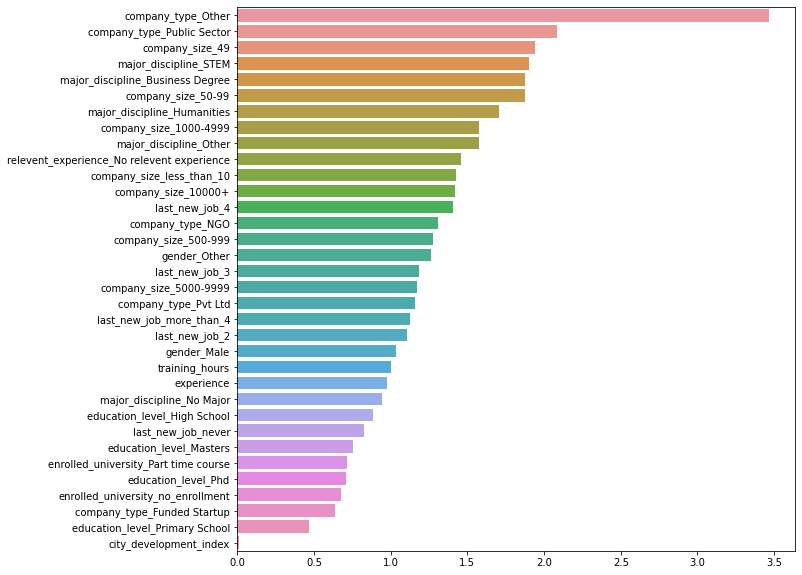

In [346]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# 2 Logistic Regression (power transformer)

In [347]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
pipe=Pipeline((
("pt",PowerTransformer()),
("lr",LogisticRegression())
))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
proba=pipe.predict_proba(X_test)[:,1]
print("trian score : ",pipe.score(X_train,y_train))
print("test score : ",pipe.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr1,tpr1,thresh=roc_curve(y_test,proba)

trian score :  0.7198922160893564
test score :  0.72066747783765

confusion matrix : 
  [[2026  827]
 [ 780 2120]]

precision score : 0.7193756362402444
recall score :  0.7310344827586207
auc :  0.7655887329731559

classification report : 
               precision    recall  f1-score   support

           0       0.72      0.71      0.72      2853
           1       0.72      0.73      0.73      2900

    accuracy                           0.72      5753
   macro avg       0.72      0.72      0.72      5753
weighted avg       0.72      0.72      0.72      5753



In [348]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [349]:
Score = Score.append({"Name":"LR Pipeline (Transformed)",
             'Train Score':pipe.score(X_train,y_train),
             'Test Score':pipe.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [350]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.717198,0.720667,0.724246,0.720000,0.722117,0.765705,2058,795,812,2088
1,LR Pipeline (Transformed),0.719892,0.720667,0.719376,0.731034,0.725158,0.765589,2026,827,780,2120


In [351]:
ser=pd.Series(np.exp(pipe.steps[1][1].coef_).tolist()[0],index=X_train.columns).sort_values(ascending=False)
ser

company_type_Other                            1.525236
company_size_50-99                            1.216522
relevent_experience_No relevent experience    1.111615
company_size_10000+                           1.085808
company_size_49                               1.079900
company_type_Public Sector                    1.068218
company_size_1000-4999                        1.061134
last_new_job_4                                1.061109
last_new_job_more_than_4                      1.051293
last_new_job_2                                1.042546
last_new_job_3                                1.020883
company_size_5000-9999                        1.020020
company_size_500-999                          1.014916
gender_Other                                  1.011735
company_type_NGO                              1.005084
major_discipline_Business Degree              1.003457
company_size_less_than_10                     0.994319
major_discipline_Humanities                   0.981840
gender_Mal

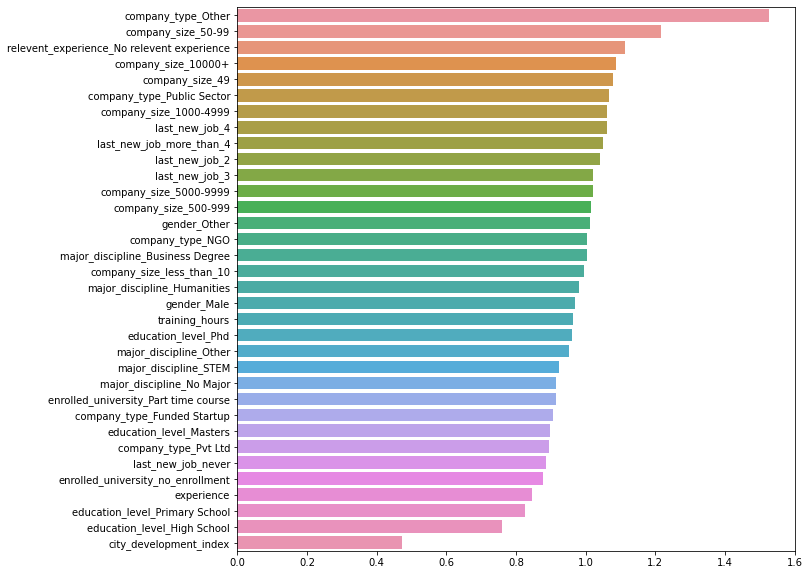

In [352]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

In [353]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
pt=PowerTransformer()
X_train_pt=pt.fit_transform(X_train)
X_test_pt=pt.transform(X_test)
lr=LogisticRegression()
lr.fit(X_train_pt,y_train)
print(lr.score(X_train_pt,y_train))
print(np.exp(lr.coef_))


0.7198922160893564
[[0.47176263 0.84654766 0.96446658 0.96865248 1.01173519 1.11161471
  0.91434319 0.87900783 0.75949599 0.89697645 0.96093986 0.82669585
  1.00345683 0.98184015 0.91528551 0.9535502  0.9234499  1.06113436
  1.08580839 1.07989984 1.21652195 1.01491646 1.02002047 0.99431947
  0.90616742 1.00508393 1.52523602 1.06821821 0.8955127  1.04254588
  1.02088267 1.06110852 1.05129294 0.88522877]]


In [354]:
-0.63176294-(-6.53738110e-01)

0.021975170000000044

In [355]:
0.531654-0.52009796

0.01155603999999999

# 3 Decision tree 

In [356]:
from sklearn.tree import DecisionTreeClassifier

In [357]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
dt=DecisionTreeClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
proba=dt.predict_proba(X_test)[:,1]
print("trian score : ",dt.score(X_train,y_train))
print("test score : ",dt.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr2,tpr2,thresh=roc_curve(y_test,proba)

trian score :  0.998261549828328
test score :  0.8717191030766557

confusion matrix : 
  [[2264  589]
 [ 149 2751]]

precision score : 0.8236526946107784
recall score :  0.9486206896551724
auc :  0.871347885468412

classification report : 
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      2853
           1       0.82      0.95      0.88      2900

    accuracy                           0.87      5753
   macro avg       0.88      0.87      0.87      5753
weighted avg       0.88      0.87      0.87      5753



In [358]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [359]:
Score = Score.append({"Name":"Decision Tree ",
             'Train Score':dt.score(X_train,y_train),
             'Test Score':dt.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [360]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.717198,0.720667,0.724246,0.720000,0.722117,0.765705,2058,795,812,2088
1,LR Pipeline (Transformed),0.719892,0.720667,0.719376,0.731034,0.725158,0.765589,2026,827,780,2120
2,Decision Tree,0.998262,0.871719,0.823653,0.948621,0.881731,0.871348,2264,589,149,2751


In [361]:
ser=pd.Series(dt.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

city_development_index                        0.242191
training_hours                                0.228238
experience                                    0.118245
company_type_Other                            0.094584
company_size_50-99                            0.028446
relevent_experience_No relevent experience    0.025516
education_level_Masters                       0.021491
enrolled_university_no_enrollment             0.019109
last_new_job_2                                0.018831
major_discipline_No Major                     0.018554
last_new_job_never                            0.017177
gender_Male                                   0.015125
last_new_job_more_than_4                      0.014983
last_new_job_3                                0.010841
company_type_Pvt Ltd                          0.010334
company_size_less_than_10                     0.009252
major_discipline_STEM                         0.008921
company_size_49                               0.008631
enrolled_u

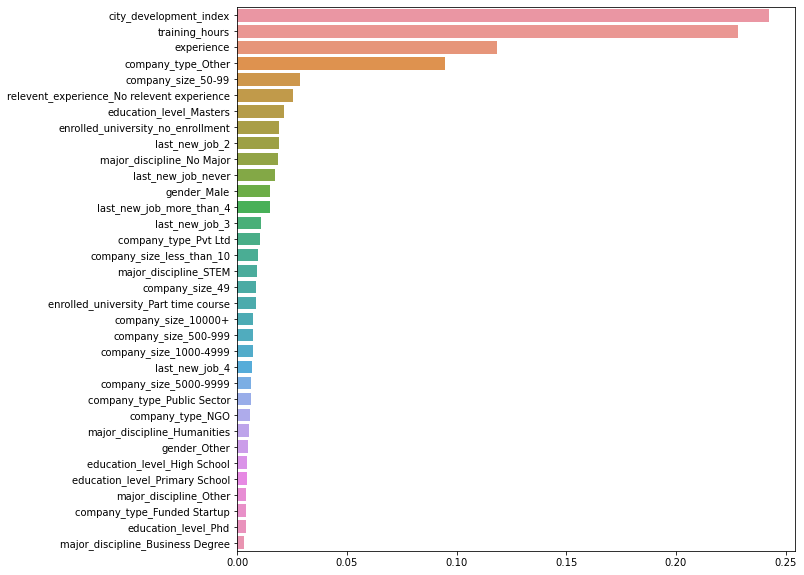

In [362]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# 4 Decision Tree (power transformer )

In [363]:
from sklearn.tree import DecisionTreeClassifier

In [364]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
pipe=Pipeline((
("pt",PowerTransformer()),
("dt",DecisionTreeClassifier(random_state=10))
))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
proba=pipe.predict_proba(X_test)[:,1]
print("trian score : ",pipe.score(X_train,y_train))
print("test score : ",pipe.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr3,tpr3,thresh=roc_curve(y_test,proba)

trian score :  0.998261549828328
test score :  0.8713714583695463

confusion matrix : 
  [[2263  590]
 [ 150 2750]]

precision score : 0.8233532934131736
recall score :  0.9482758620689655
auc :  0.8708683539408004

classification report : 
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      2853
           1       0.82      0.95      0.88      2900

    accuracy                           0.87      5753
   macro avg       0.88      0.87      0.87      5753
weighted avg       0.88      0.87      0.87      5753



In [365]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [366]:
Score = Score.append({"Name":"Decision Tree Pipeline (Transformed)",
             'Train Score':pipe.score(X_train,y_train),
             'Test Score':pipe.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [367]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.717198,0.720667,0.724246,0.720000,0.722117,0.765705,2058,795,812,2088
1,LR Pipeline (Transformed),0.719892,0.720667,0.719376,0.731034,0.725158,0.765589,2026,827,780,2120
2,Decision Tree,0.998262,0.871719,0.823653,0.948621,0.881731,0.871348,2264,589,149,2751
3,Decision Tree Pipeline (Transformed),0.998262,0.871371,0.823353,0.948276,0.881410,0.870868,2263,590,150,2750


In [368]:
ser=pd.Series(pipe.steps[1][1].feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

city_development_index                        0.242191
training_hours                                0.228238
experience                                    0.118245
company_type_Other                            0.094584
company_size_50-99                            0.028446
relevent_experience_No relevent experience    0.025516
education_level_Masters                       0.021491
enrolled_university_no_enrollment             0.019109
last_new_job_2                                0.018831
major_discipline_No Major                     0.018554
last_new_job_never                            0.017177
gender_Male                                   0.015125
last_new_job_more_than_4                      0.014983
last_new_job_3                                0.010841
company_type_Pvt Ltd                          0.010334
company_size_less_than_10                     0.009252
major_discipline_STEM                         0.008921
company_size_49                               0.008631
enrolled_u

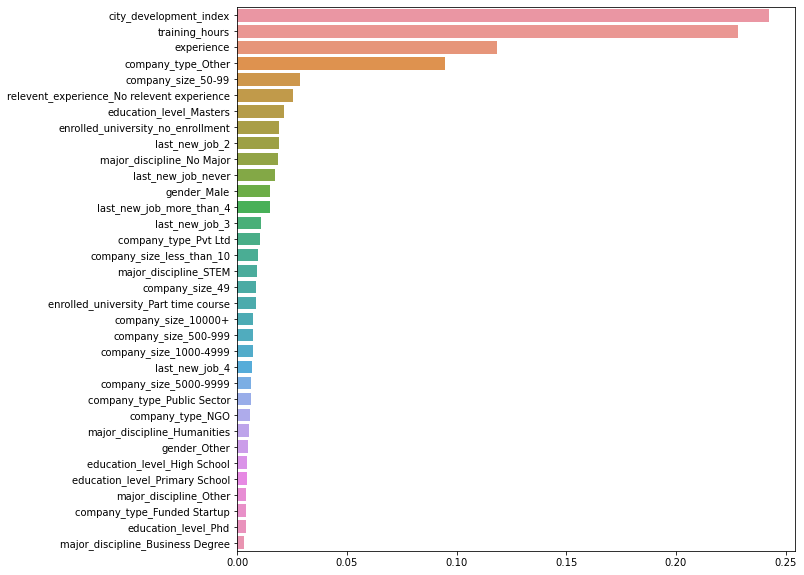

In [369]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# 5 Random Forest Classifier

In [370]:
from sklearn.ensemble import RandomForestClassifier

In [371]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
rf=RandomForestClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
proba=rf.predict_proba(X_test)[:,1]
print("trian score : ",rf.score(X_train,y_train))
print("test score : ",rf.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr4,tpr4,thresh=roc_curve(y_test,proba)

trian score :  0.998261549828328
test score :  0.9009212584738397

confusion matrix : 
  [[2405  448]
 [ 122 2778]]

precision score : 0.861128332300062
recall score :  0.9579310344827586
auc :  0.9623155299321947

classification report : 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      2853
           1       0.86      0.96      0.91      2900

    accuracy                           0.90      5753
   macro avg       0.91      0.90      0.90      5753
weighted avg       0.91      0.90      0.90      5753



In [372]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [373]:
Score = Score.append({"Name":"Random Forest Classifier ",
             'Train Score':rf.score(X_train,y_train),
             'Test Score':rf.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [374]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.717198,0.720667,0.724246,0.720000,0.722117,0.765705,2058,795,812,2088
1,LR Pipeline (Transformed),0.719892,0.720667,0.719376,0.731034,0.725158,0.765589,2026,827,780,2120
2,Decision Tree,0.998262,0.871719,0.823653,0.948621,0.881731,0.871348,2264,589,149,2751
3,Decision Tree Pipeline (Transformed),0.998262,0.871371,0.823353,0.948276,0.881410,0.870868,2263,590,150,2750
4,Random Forest Classifier,0.998262,0.900921,0.861128,0.957931,0.906954,0.962316,2405,448,122,2778


In [375]:
ser=pd.Series(rf.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

city_development_index                        0.263461
training_hours                                0.238272
experience                                    0.142224
company_type_Other                            0.039882
company_size_50-99                            0.029012
company_type_Pvt Ltd                          0.024749
enrolled_university_no_enrollment             0.019798
relevent_experience_No relevent experience    0.019266
education_level_Masters                       0.018768
gender_Male                                   0.018381
last_new_job_2                                0.016875
last_new_job_never                            0.015815
last_new_job_more_than_4                      0.013098
major_discipline_STEM                         0.010777
major_discipline_No Major                     0.009298
last_new_job_3                                0.009209
last_new_job_4                                0.008923
company_size_10000+                           0.008606
company_si

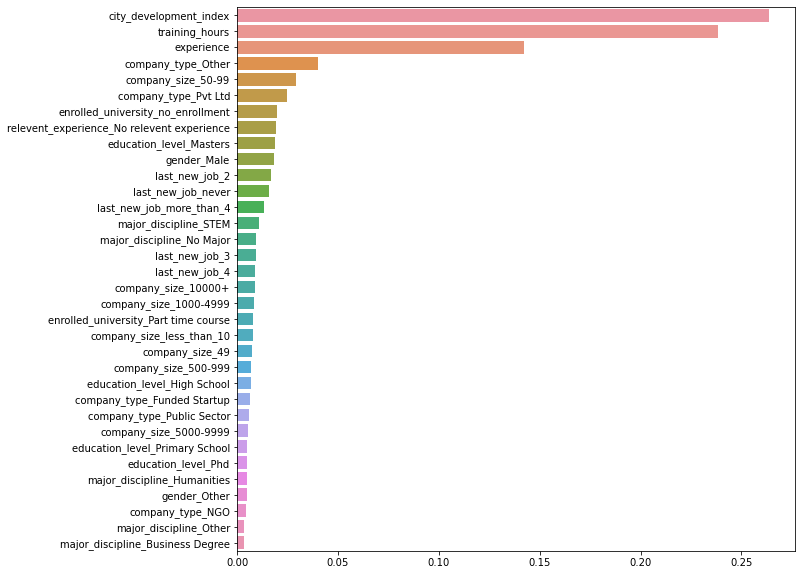

In [376]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

#  6 Random Forest (power transformer)

In [377]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
pipe=Pipeline((
("pt",PowerTransformer()),
("rf",RandomForestClassifier(random_state=10))
))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
proba=pipe.predict_proba(X_test)[:,1]
print("trian score : ",pipe.score(X_train,y_train))
print("test score : ",pipe.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr5,tpr5,thresh=roc_curve(y_test,proba)

trian score :  0.998261549828328
test score :  0.9014427255345038

confusion matrix : 
  [[2408  445]
 [ 122 2778]]

precision score : 0.8619298789947254
recall score :  0.9579310344827586
auc :  0.9620337938286376

classification report : 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      2853
           1       0.86      0.96      0.91      2900

    accuracy                           0.90      5753
   macro avg       0.91      0.90      0.90      5753
weighted avg       0.91      0.90      0.90      5753



In [378]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [379]:
Score = Score.append({"Name":"Random Forest Pipeline(Transformed) ",
             'Train Score':pipe.score(X_train,y_train),
             'Test Score':pipe.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [380]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.717198,0.720667,0.724246,0.720000,0.722117,0.765705,2058,795,812,2088
1,LR Pipeline (Transformed),0.719892,0.720667,0.719376,0.731034,0.725158,0.765589,2026,827,780,2120
2,Decision Tree,0.998262,0.871719,0.823653,0.948621,0.881731,0.871348,2264,589,149,2751
3,Decision Tree Pipeline (Transformed),0.998262,0.871371,0.823353,0.948276,0.881410,0.870868,2263,590,150,2750
4,Random Forest Classifier,0.998262,0.900921,0.861128,0.957931,0.906954,0.962316,2405,448,122,2778
5,Random Forest Pipeline(Transformed),0.998262,0.901443,0.861930,0.957931,0.907398,0.962034,2408,445,122,2778


In [381]:
ser=pd.Series(pipe.steps[1][1].feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

city_development_index                        0.263461
training_hours                                0.238272
experience                                    0.142224
company_type_Other                            0.039882
company_size_50-99                            0.029012
company_type_Pvt Ltd                          0.024749
enrolled_university_no_enrollment             0.019798
relevent_experience_No relevent experience    0.019266
education_level_Masters                       0.018768
gender_Male                                   0.018381
last_new_job_2                                0.016875
last_new_job_never                            0.015815
last_new_job_more_than_4                      0.013098
major_discipline_STEM                         0.010777
major_discipline_No Major                     0.009298
last_new_job_3                                0.009209
last_new_job_4                                0.008923
company_size_10000+                           0.008606
company_si

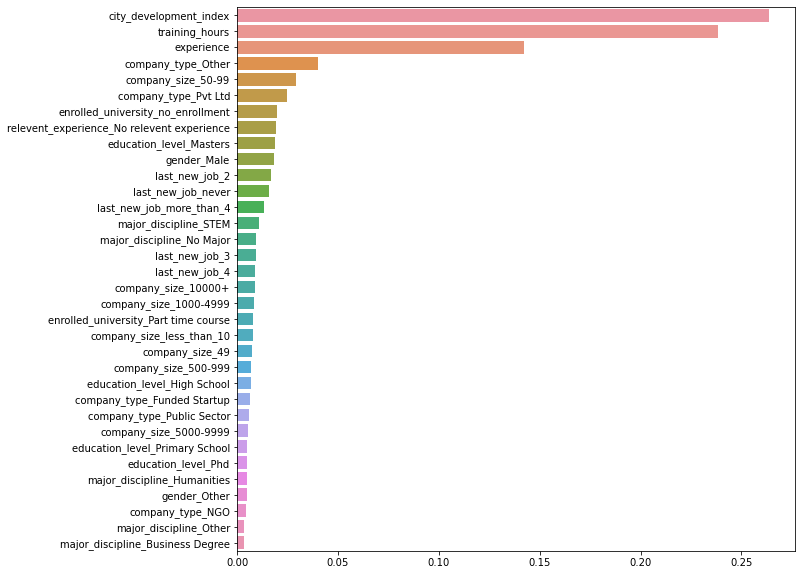

In [382]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# AdaBoost

In [383]:
from sklearn.ensemble import AdaBoostClassifier

In [384]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
ad=AdaBoostClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
ad.fit(X_train,y_train)
y_pred=ad.predict(X_test)
proba=ad.predict_proba(X_test)[:,1]
print("trian score : ",ad.score(X_train,y_train))
print("test score : ",ad.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr6,tpr6,thresh=roc_curve(y_test,proba)

trian score :  0.7581815811204311
test score :  0.7573439944376846

confusion matrix : 
  [[2236  617]
 [ 779 2121]]

precision score : 0.7746530314097881
recall score :  0.7313793103448276
auc :  0.7926074791205869

classification report : 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76      2853
           1       0.77      0.73      0.75      2900

    accuracy                           0.76      5753
   macro avg       0.76      0.76      0.76      5753
weighted avg       0.76      0.76      0.76      5753



In [385]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [386]:
Score = Score.append({"Name":"AdaBoost Classifier ",
             'Train Score':ad.score(X_train,y_train),
             'Test Score':ad.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [387]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.717198,0.720667,0.724246,0.720000,0.722117,0.765705,2058,795,812,2088
1,LR Pipeline (Transformed),0.719892,0.720667,0.719376,0.731034,0.725158,0.765589,2026,827,780,2120
2,Decision Tree,0.998262,0.871719,0.823653,0.948621,0.881731,0.871348,2264,589,149,2751
3,Decision Tree Pipeline (Transformed),0.998262,0.871371,0.823353,0.948276,0.881410,0.870868,2263,590,150,2750
4,Random Forest Classifier,0.998262,0.900921,0.861128,0.957931,0.906954,0.962316,2405,448,122,2778
5,Random Forest Pipeline(Transformed),0.998262,0.901443,0.861930,0.957931,0.907398,0.962034,2408,445,122,2778
6,AdaBoost Classifier,0.758182,0.757344,0.774653,0.731379,0.752394,0.792607,2236,617,779,2121


In [388]:
ser=pd.Series(ad.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

city_development_index                        0.32
training_hours                                0.16
experience                                    0.06
company_type_Other                            0.04
enrolled_university_no_enrollment             0.04
company_size_50-99                            0.04
last_new_job_more_than_4                      0.02
gender_Male                                   0.02
relevent_experience_No relevent experience    0.02
enrolled_university_Part time course          0.02
education_level_High School                   0.02
education_level_Masters                       0.02
education_level_Primary School                0.02
major_discipline_No Major                     0.02
major_discipline_Other                        0.02
last_new_job_never                            0.02
company_type_Funded Startup                   0.02
company_type_NGO                              0.02
last_new_job_4                                0.02
last_new_job_2                 

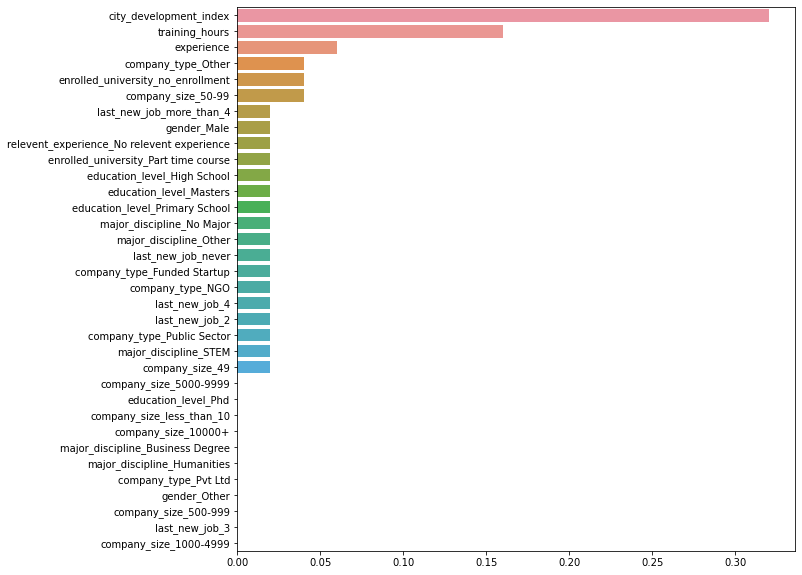

In [389]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# Gradiant Boost 

In [390]:
from sklearn.ensemble import GradientBoostingClassifier

In [391]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
gb=GradientBoostingClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
proba=gb.predict_proba(X_test)[:,1]
print("trian score : ",gb.score(X_train,y_train))
print("test score : ",gb.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr7,tpr7,thresh=roc_curve(y_test,proba)

trian score :  0.7669172932330827
test score :  0.7663827568225273

confusion matrix : 
  [[2248  605]
 [ 739 2161]]

precision score : 0.7812725958062183
recall score :  0.7451724137931034
auc :  0.8093322213761678

classification report : 
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      2853
           1       0.78      0.75      0.76      2900

    accuracy                           0.77      5753
   macro avg       0.77      0.77      0.77      5753
weighted avg       0.77      0.77      0.77      5753



In [392]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [393]:
Score = Score.append({"Name":"Gradiant Boosting Classifier ",
             'Train Score':gb.score(X_train,y_train),
             'Test Score':gb.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [394]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.717198,0.720667,0.724246,0.720000,0.722117,0.765705,2058,795,812,2088
1,LR Pipeline (Transformed),0.719892,0.720667,0.719376,0.731034,0.725158,0.765589,2026,827,780,2120
2,Decision Tree,0.998262,0.871719,0.823653,0.948621,0.881731,0.871348,2264,589,149,2751
3,Decision Tree Pipeline (Transformed),0.998262,0.871371,0.823353,0.948276,0.881410,0.870868,2263,590,150,2750
4,Random Forest Classifier,0.998262,0.900921,0.861128,0.957931,0.906954,0.962316,2405,448,122,2778
5,Random Forest Pipeline(Transformed),0.998262,0.901443,0.861930,0.957931,0.907398,0.962034,2408,445,122,2778
6,AdaBoost Classifier,0.758182,0.757344,0.774653,0.731379,0.752394,0.792607,2236,617,779,2121
7,Gradiant Boosting Classifier,0.766917,0.766383,0.781273,0.745172,0.762796,0.809332,2248,605,739,2161


In [395]:
ser=pd.Series(gb.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

city_development_index                        0.519263
company_type_Other                            0.275812
major_discipline_No Major                     0.046595
company_size_50-99                            0.036027
training_hours                                0.022445
experience                                    0.016894
enrolled_university_no_enrollment             0.015381
company_type_Public Sector                    0.014926
relevent_experience_No relevent experience    0.010943
last_new_job_never                            0.007870
education_level_Primary School                0.007260
company_type_Pvt Ltd                          0.003814
education_level_Masters                       0.002475
company_type_Funded Startup                   0.002138
last_new_job_4                                0.002092
last_new_job_3                                0.002048
company_size_49                               0.002033
education_level_High School                   0.001389
last_new_j

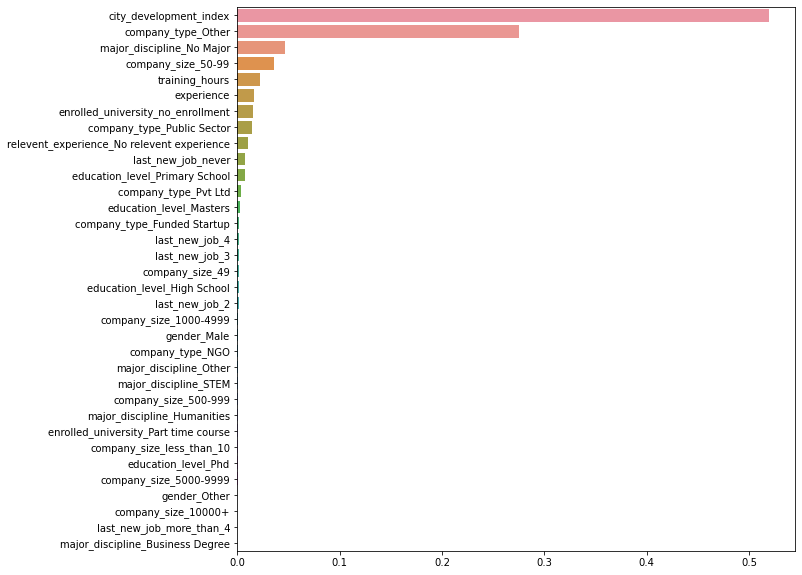

In [396]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# XGboost

In [397]:
from xgboost import XGBClassifier

In [398]:
hr.columns

Index(['city_development_index', 'experience', 'training_hours', 'gender_Male',
       'gender_Other', 'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_High School',
       'education_level_Masters', 'education_level_Phd',
       'education_level_Primary School', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'company_size_1000-4999', 'company_size_10000+', 'company_size_49',
       'company_size_50-99', 'company_size_500-999', 'company_size_5000-9999',
       'company_size_less_than_10', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'last_new_job_2', 'last_new_job_3',
       'last_new_job_4', 'last_new_job_more_than_4', 'last_new_job_never',
       'job_change'],
      

In [399]:
hr.columns=hr.rename(columns={"last_new_job_>4":"last_new_job_more_than_4",'company_size_<10':'company_size_less_than_10'}).columns

In [400]:
hr.columns

Index(['city_development_index', 'experience', 'training_hours', 'gender_Male',
       'gender_Other', 'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_High School',
       'education_level_Masters', 'education_level_Phd',
       'education_level_Primary School', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'company_size_1000-4999', 'company_size_10000+', 'company_size_49',
       'company_size_50-99', 'company_size_500-999', 'company_size_5000-9999',
       'company_size_less_than_10', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'last_new_job_2', 'last_new_job_3',
       'last_new_job_4', 'last_new_job_more_than_4', 'last_new_job_never',
       'job_change'],
      

In [401]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
xg=XGBClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
proba=xg.predict_proba(X_test)[:,1]
print("trian score : ",xg.score(X_train,y_train))
print("test score : ",xg.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr8,tpr8,thresh=roc_curve(y_test,proba)

[19:46:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
trian score :  0.8606632187404929
test score :  0.8133147922822875

confusion matrix : 
  [[2300  553]
 [ 521 2379]]

precision score : 0.8113915416098226
recall score :  0.8203448275862069
auc :  0.8750195801153051

classification report : 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      2853
           1       0.81      0.82      0.82      2900

    accuracy                           0.81      5753
   macro avg       0.81      0.81      0.81      5753
weighted avg       0.81      0.81      0.81      5753



In [402]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [403]:
Score = Score.append({"Name":"XGBoost Classifier ",
             'Train Score':xg.score(X_train,y_train),
             'Test Score':xg.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [404]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.717198,0.720667,0.724246,0.720000,0.722117,0.765705,2058,795,812,2088
1,LR Pipeline (Transformed),0.719892,0.720667,0.719376,0.731034,0.725158,0.765589,2026,827,780,2120
2,Decision Tree,0.998262,0.871719,0.823653,0.948621,0.881731,0.871348,2264,589,149,2751
3,Decision Tree Pipeline (Transformed),0.998262,0.871371,0.823353,0.948276,0.881410,0.870868,2263,590,150,2750
4,Random Forest Classifier,0.998262,0.900921,0.861128,0.957931,0.906954,0.962316,2405,448,122,2778
5,Random Forest Pipeline(Transformed),0.998262,0.901443,0.861930,0.957931,0.907398,0.962034,2408,445,122,2778
6,AdaBoost Classifier,0.758182,0.757344,0.774653,0.731379,0.752394,0.792607,2236,617,779,2121
7,Gradiant Boosting Classifier,0.766917,0.766383,0.781273,0.745172,0.762796,0.809332,2248,605,739,2161
8,XGBoost Classifier,0.860663,0.813315,0.811392,0.820345,0.815844,0.875020,2300,553,521,2379


In [405]:
ser=pd.Series(xg.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

company_type_Other                            0.235525
major_discipline_No Major                     0.128149
city_development_index                        0.061050
company_size_50-99                            0.034878
company_type_Public Sector                    0.031792
education_level_Primary School                0.026921
last_new_job_never                            0.025895
education_level_Phd                           0.024774
relevent_experience_No relevent experience    0.024224
enrolled_university_no_enrollment             0.020176
company_size_5000-9999                        0.019853
major_discipline_Humanities                   0.019690
last_new_job_4                                0.018495
company_size_1000-4999                        0.018176
education_level_Masters                       0.017417
company_size_less_than_10                     0.017130
gender_Male                                   0.016755
experience                                    0.016429
company_si

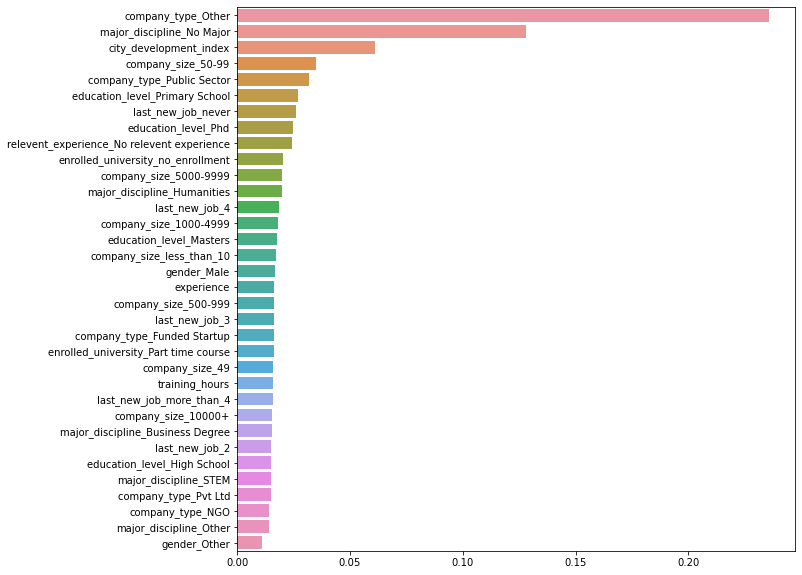

In [406]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# Light GBM Classifier

In [407]:
from lightgbm import LGBMClassifier

In [408]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
lgbm=LGBMClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
lgbm.fit(X_train,y_train)
y_pred=lgbm.predict(X_test)
proba=lgbm.predict_proba(X_test)[:,1]
print("trian score : ",lgbm.score(X_train,y_train))
print("test score : ",lgbm.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr9,tpr9,thresh=roc_curve(y_test,proba)

trian score :  0.804467816941197
test score :  0.7934990439770554

confusion matrix : 
  [[2317  536]
 [ 652 2248]]

precision score : 0.8074712643678161
recall score :  0.7751724137931034
auc :  0.8503288734181806

classification report : 
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      2853
           1       0.81      0.78      0.79      2900

    accuracy                           0.79      5753
   macro avg       0.79      0.79      0.79      5753
weighted avg       0.79      0.79      0.79      5753



In [409]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [410]:
Score = Score.append({"Name":"Light GBM Classifier ",
             'Train Score':lgbm.score(X_train,y_train),
             'Test Score':lgbm.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [411]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.717198,0.720667,0.724246,0.720000,0.722117,0.765705,2058,795,812,2088
1,LR Pipeline (Transformed),0.719892,0.720667,0.719376,0.731034,0.725158,0.765589,2026,827,780,2120
2,Decision Tree,0.998262,0.871719,0.823653,0.948621,0.881731,0.871348,2264,589,149,2751
3,Decision Tree Pipeline (Transformed),0.998262,0.871371,0.823353,0.948276,0.881410,0.870868,2263,590,150,2750
4,Random Forest Classifier,0.998262,0.900921,0.861128,0.957931,0.906954,0.962316,2405,448,122,2778
5,Random Forest Pipeline(Transformed),0.998262,0.901443,0.861930,0.957931,0.907398,0.962034,2408,445,122,2778
6,AdaBoost Classifier,0.758182,0.757344,0.774653,0.731379,0.752394,0.792607,2236,617,779,2121
7,Gradiant Boosting Classifier,0.766917,0.766383,0.781273,0.745172,0.762796,0.809332,2248,605,739,2161
8,XGBoost Classifier,0.860663,0.813315,0.811392,0.820345,0.815844,0.875020,2300,553,521,2379
9,Light GBM Classifier,0.804468,0.793499,0.807471,0.775172,0.790992,0.850329,2317,536,652,2248


In [412]:
ser=pd.Series(lgbm.feature_importances_.tolist(),index=X_train.columns).sort_values(ascending=False)
ser

training_hours                                851
city_development_index                        557
experience                                    459
enrolled_university_no_enrollment              94
company_size_50-99                             83
relevent_experience_No relevent experience     68
company_type_Other                             68
company_type_Pvt Ltd                           67
education_level_Masters                        67
last_new_job_never                             61
company_size_1000-4999                         42
major_discipline_STEM                          40
education_level_High School                    36
company_size_49                                35
gender_Male                                    35
last_new_job_more_than_4                       34
major_discipline_No Major                      31
last_new_job_2                                 30
company_size_500-999                           29
company_size_5000-9999                         27


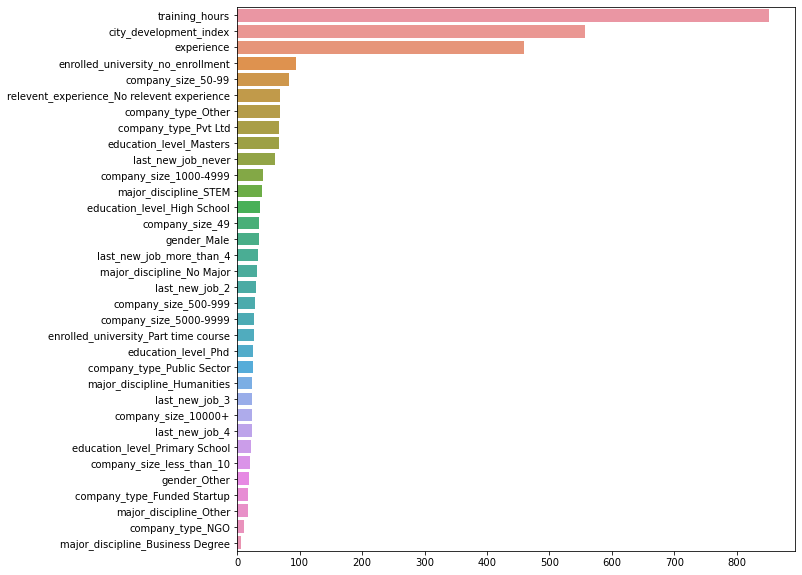

In [413]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(ser.values,ser.index);

# KNN

In [414]:
from sklearn.neighbors import KNeighborsClassifier

In [415]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
knn=KNeighborsClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
proba=knn.predict_proba(X_test)[:,1]
print("trian score : ",knn.score(X_train,y_train))
print("test score : ",knn.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr10,tpr10,thresh=roc_curve(y_test,proba)

trian score :  0.8090312486418358
test score :  0.7116287154528073

confusion matrix : 
  [[1770 1083]
 [ 576 2324]]

precision score : 0.6821250366891694
recall score :  0.8013793103448276
auc :  0.7832830535310683

classification report : 
               precision    recall  f1-score   support

           0       0.75      0.62      0.68      2853
           1       0.68      0.80      0.74      2900

    accuracy                           0.71      5753
   macro avg       0.72      0.71      0.71      5753
weighted avg       0.72      0.71      0.71      5753



In [416]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [417]:
Score = Score.append({"Name":"K Nearest Neighbor Classifier ",
             'Train Score':knn.score(X_train,y_train),
             'Test Score':knn.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [418]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.717198,0.720667,0.724246,0.720000,0.722117,0.765705,2058,795,812,2088
1,LR Pipeline (Transformed),0.719892,0.720667,0.719376,0.731034,0.725158,0.765589,2026,827,780,2120
2,Decision Tree,0.998262,0.871719,0.823653,0.948621,0.881731,0.871348,2264,589,149,2751
3,Decision Tree Pipeline (Transformed),0.998262,0.871371,0.823353,0.948276,0.881410,0.870868,2263,590,150,2750
4,Random Forest Classifier,0.998262,0.900921,0.861128,0.957931,0.906954,0.962316,2405,448,122,2778
5,Random Forest Pipeline(Transformed),0.998262,0.901443,0.861930,0.957931,0.907398,0.962034,2408,445,122,2778
6,AdaBoost Classifier,0.758182,0.757344,0.774653,0.731379,0.752394,0.792607,2236,617,779,2121
7,Gradiant Boosting Classifier,0.766917,0.766383,0.781273,0.745172,0.762796,0.809332,2248,605,739,2161
8,XGBoost Classifier,0.860663,0.813315,0.811392,0.820345,0.815844,0.875020,2300,553,521,2379
9,Light GBM Classifier,0.804468,0.793499,0.807471,0.775172,0.790992,0.850329,2317,536,652,2248


# Naive Bayes 

In [419]:
from sklearn.naive_bayes import GaussianNB

In [420]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
nb=GaussianNB()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
proba=nb.predict_proba(X_test)[:,1]
print("trian score : ",nb.score(X_train,y_train))
print("test score : ",nb.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr11,tpr11,thresh=roc_curve(y_test,proba)

trian score :  0.6535703420400713
test score :  0.6575699634973058

confusion matrix : 
  [[1681 1172]
 [ 798 2102]]

precision score : 0.6420281001832621
recall score :  0.7248275862068966
auc :  0.7092977144445654

classification report : 
               precision    recall  f1-score   support

           0       0.68      0.59      0.63      2853
           1       0.64      0.72      0.68      2900

    accuracy                           0.66      5753
   macro avg       0.66      0.66      0.66      5753
weighted avg       0.66      0.66      0.66      5753



In [421]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

In [422]:
Score = Score.append({"Name":"Naive Bayes Classifier ",
             'Train Score':nb.score(X_train,y_train),
             'Test Score':nb.score(X_test,y_test),
             'Precision Score':precision_score(y_test,y_pred),
             'Recall Score':recall_score(y_test,y_pred),
             'F1-Score':f1_score(y_test,y_pred),
            'ROC - AUC':roc_auc_score(y_test,proba),
             'TN':TN,'FP':FP, 'FN':FN, 'TP':TP},ignore_index=True)

In [423]:
Score

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
0,Logistic Regression,0.717198,0.720667,0.724246,0.720000,0.722117,0.765705,2058,795,812,2088
1,LR Pipeline (Transformed),0.719892,0.720667,0.719376,0.731034,0.725158,0.765589,2026,827,780,2120
2,Decision Tree,0.998262,0.871719,0.823653,0.948621,0.881731,0.871348,2264,589,149,2751
3,Decision Tree Pipeline (Transformed),0.998262,0.871371,0.823353,0.948276,0.881410,0.870868,2263,590,150,2750
4,Random Forest Classifier,0.998262,0.900921,0.861128,0.957931,0.906954,0.962316,2405,448,122,2778
5,Random Forest Pipeline(Transformed),0.998262,0.901443,0.861930,0.957931,0.907398,0.962034,2408,445,122,2778
6,AdaBoost Classifier,0.758182,0.757344,0.774653,0.731379,0.752394,0.792607,2236,617,779,2121
7,Gradiant Boosting Classifier,0.766917,0.766383,0.781273,0.745172,0.762796,0.809332,2248,605,739,2161
8,XGBoost Classifier,0.860663,0.813315,0.811392,0.820345,0.815844,0.875020,2300,553,521,2379
9,Light GBM Classifier,0.804468,0.793499,0.807471,0.775172,0.790992,0.850329,2317,536,652,2248


# PLOT AUC ROC

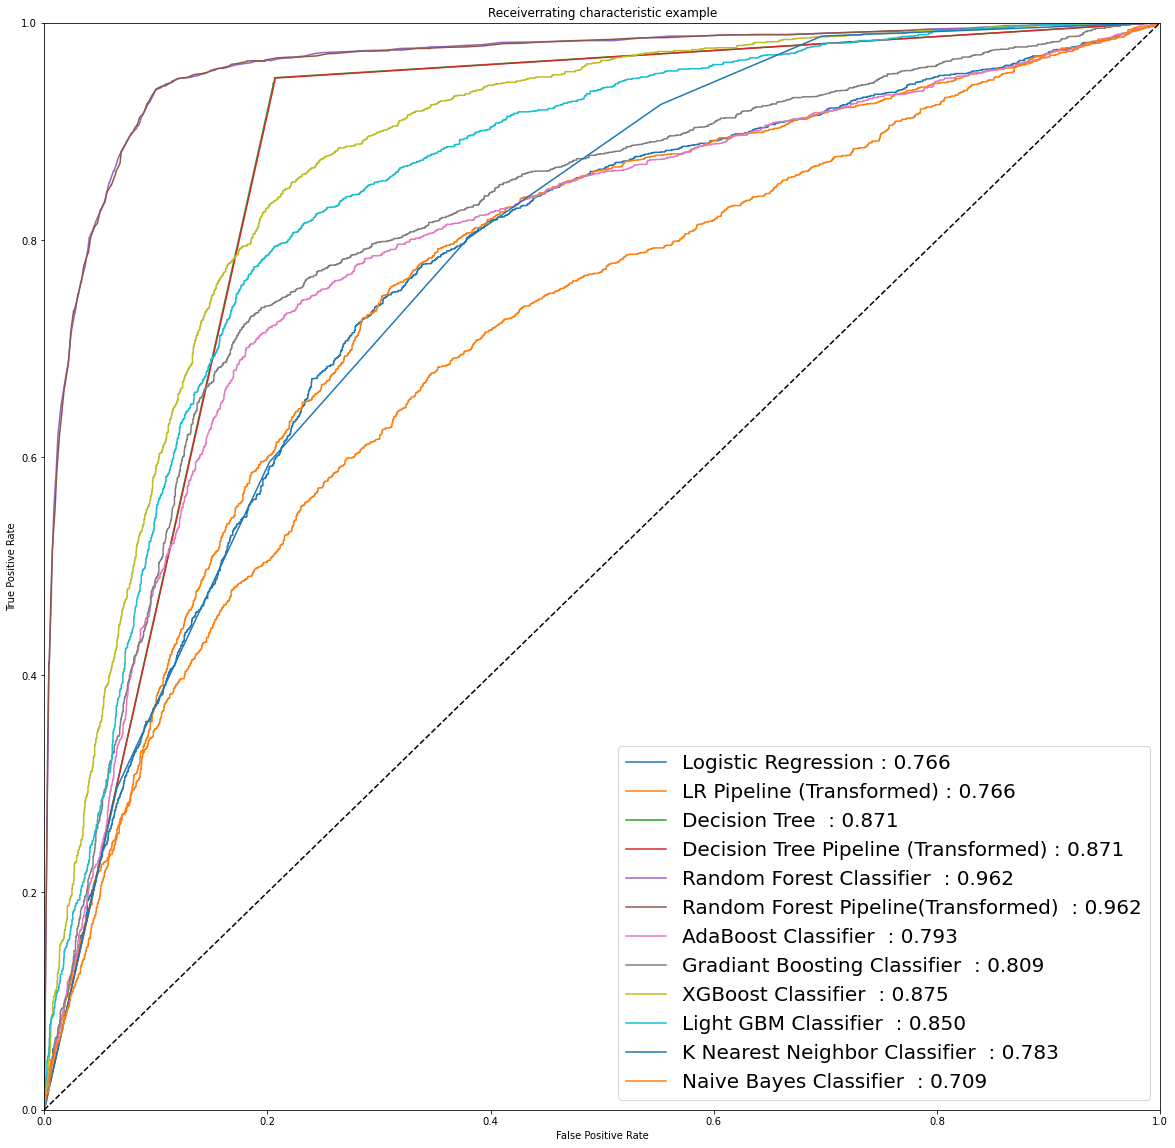

In [424]:
plt.figure(figsize=(20,20))
plt.plot(fpr0,tpr0,label="{0} : {1:.3f}".format(Score["Name"][0],auc(fpr0,tpr0)))
plt.plot(fpr1,tpr1,label="{0} : {1:.3f}".format(Score["Name"][1],auc(fpr1,tpr1)))
plt.plot(fpr2,tpr2,label="{0} : {1:.3f}".format(Score["Name"][2],auc(fpr2,tpr2)))
plt.plot(fpr3,tpr3,label="{0} : {1:.3f}".format(Score["Name"][3],auc(fpr3,tpr3)))
plt.plot(fpr4,tpr4,label="{0} : {1:.3f}".format(Score["Name"][4],auc(fpr4,tpr4)))
plt.plot(fpr5,tpr5,label="{0} : {1:.3f}".format(Score["Name"][5],auc(fpr5,tpr5)))
plt.plot(fpr6,tpr6,label="{0} : {1:.3f}".format(Score["Name"][6],auc(fpr6,tpr6)))
plt.plot(fpr7,tpr7,label="{0} : {1:.3f}".format(Score["Name"][7],auc(fpr7,tpr7)))
plt.plot(fpr8,tpr8,label="{0} : {1:.3f}".format(Score["Name"][8],auc(fpr8,tpr8)))
plt.plot(fpr9,tpr9,label="{0} : {1:.3f}".format(Score["Name"][9],auc(fpr9,tpr9)))
plt.plot(fpr10,tpr10,label="{0} : {1:.3f}".format(Score["Name"][10],auc(fpr10,tpr10)))
plt.plot(fpr11,tpr11,label="{0} : {1:.3f}".format(Score["Name"][11],auc(fpr11,tpr11)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc="lower right",prop={'size':20})
plt.show()

In [425]:
# this table represents all the scores of the models found above 
Score.sort_values(by="Recall Score",ascending=False)

,Name,Train Score,Test Score,Precision Score,Recall Score,F1-Score,ROC - AUC,TN,FP,FN,TP
4,Random Forest Classifier,0.998262,0.900921,0.861128,0.957931,0.906954,0.962316,2405,448,122,2778
5,Random Forest Pipeline(Transformed),0.998262,0.901443,0.861930,0.957931,0.907398,0.962034,2408,445,122,2778
2,Decision Tree,0.998262,0.871719,0.823653,0.948621,0.881731,0.871348,2264,589,149,2751
3,Decision Tree Pipeline (Transformed),0.998262,0.871371,0.823353,0.948276,0.881410,0.870868,2263,590,150,2750
8,XGBoost Classifier,0.860663,0.813315,0.811392,0.820345,0.815844,0.875020,2300,553,521,2379
10,K Nearest Neighbor Classifier,0.809031,0.711629,0.682125,0.801379,0.736959,0.783283,1770,1083,576,2324
9,Light GBM Classifier,0.804468,0.793499,0.807471,0.775172,0.790992,0.850329,2317,536,652,2248
7,Gradiant Boosting Classifier,0.766917,0.766383,0.781273,0.745172,0.762796,0.809332,2248,605,739,2161
6,AdaBoost Classifier,0.758182,0.757344,0.774653,0.731379,0.752394,0.792607,2236,617,779,2121
1,LR Pipeline (Transformed),0.719892,0.720667,0.719376,0.731034,0.725158,0.765589,2026,827,780,2120


# Gris Search CV

## random forest

In [633]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [634]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
rf=RandomForestClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
proba=rf.predict_proba(X_test)[:,1]
print("trian score : ",rf.score(X_train,y_train))
print("test score : ",rf.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr4,tpr4,thresh=roc_curve(y_test,proba)

trian score :  0.998261549828328
test score :  0.9009212584738397

confusion matrix : 
  [[2405  448]
 [ 122 2778]]

precision score : 0.861128332300062
recall score :  0.9579310344827586
auc :  0.9623155299321947

classification report : 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      2853
           1       0.86      0.96      0.91      2900

    accuracy                           0.90      5753
   macro avg       0.91      0.90      0.90      5753
weighted avg       0.91      0.90      0.90      5753



#### hyper parameter tuning for Random Forest Classifier

In [635]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve,KFold

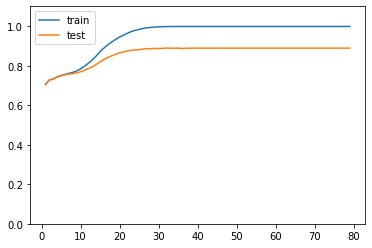

In [636]:
param_range=np.arange(1,80)
train,test=validation_curve(RandomForestClassifier(random_state=10),X_train,y_train,param_name="max_depth",
                            param_range=param_range,scoring="accuracy",n_jobs=-1,cv=10)
train_mean=np.mean(train,axis=1)
test_mean=np.mean(test,axis=1)
plt.plot(param_range,train_mean,label="train")
plt.plot(param_range,test_mean,label="test")
plt.ylim([0,1.1])
plt.legend()
plt.show()

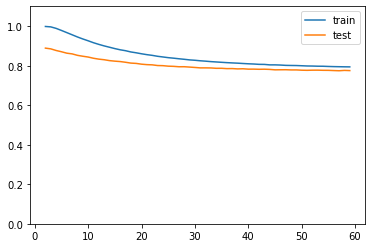

In [637]:
param_range=np.arange(1,60)
train,test=validation_curve(RandomForestClassifier(random_state=10),X_train,y_train,param_name="min_samples_split",
                            param_range=param_range,scoring="accuracy",n_jobs=-1,cv=10)
train_mean=np.mean(train,axis=1)
test_mean=np.mean(test,axis=1)
plt.plot(param_range,train_mean,label="train")
plt.plot(param_range,test_mean,label="test")
plt.ylim([0,1.1])
plt.legend()
plt.show()

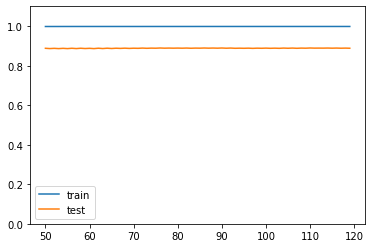

In [638]:
param_range=np.arange(50,120)
train,test=validation_curve(RandomForestClassifier(random_state=10),X_train,y_train,param_name="n_estimators",
                            param_range=param_range,scoring="accuracy",n_jobs=-1,cv=10)
train_mean=np.mean(train,axis=1)
test_mean=np.mean(test,axis=1)
plt.plot(param_range,train_mean,label="train")
plt.plot(param_range,test_mean,label="test")
plt.ylim([0,1.1])

plt.legend()
plt.show()

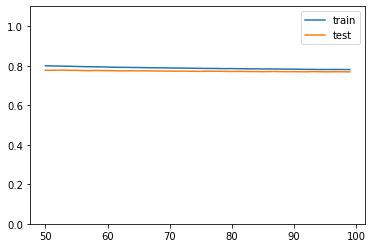

In [639]:
param_range=np.arange(50,100)
train,test=validation_curve(RandomForestClassifier(random_state=10),X_train,y_train,param_name="min_samples_split",
                            param_range=param_range,scoring="accuracy",n_jobs=-1,cv=10)
train_mean=np.mean(train,axis=1)
test_mean=np.mean(test,axis=1)
plt.plot(param_range,train_mean,label="train")
plt.plot(param_range,test_mean,label="test")
plt.ylim([0,1.1])

plt.legend()
plt.show()

In [640]:
cv=cross_val_score(RandomForestClassifier(random_state=10),X_train,y_train,cv=10,scoring="recall")
print(cv.mean())
print(cv.std())

0.9510497690765792
0.0037498438766544497


In [641]:
# n_estimators not doing any change
#min_samples_split going low so keep it 50

In [642]:
params={"criterion":["gini","entropy"],"max_depth":np.arange(4,15),"min_samples_split":[50]}
gs_rf=GridSearchCV(RandomForestClassifier(random_state=10),params,cv=10,n_jobs=-1).fit(X_train,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 50}
0.7693075033539294


In [643]:
params={"criterion":["gini","entropy"],"max_depth":np.arange(15,20),"min_samples_split":[35,40]}
gs_rf=GridSearchCV(RandomForestClassifier(random_state=10),params,cv=10,n_jobs=-1).fit(X_train,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 35}
0.7839104926024602


In [644]:
params={"criterion":["gini","entropy"],"max_depth":np.arange(30,40),"min_samples_split":[15,20]}
gs_rf=GridSearchCV(RandomForestClassifier(random_state=10),params,cv=10,n_jobs=-1).fit(X_train,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 35, 'min_samples_split': 15}
0.8275020879390814


In [645]:
params={"criterion":["gini","entropy"],"max_depth":np.arange(35,40),"min_samples_split":[5,10]}
gs_rf=GridSearchCV(RandomForestClassifier(random_state=10),params,cv=10,n_jobs=-1).fit(X_train,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'criterion': 'gini', 'max_depth': 39, 'min_samples_split': 5}
0.8710503561778433


In [646]:
params={"n_estimators":np.arange(60,80,2),"criterion":["gini","entropy"],"max_depth":np.arange(30,40),"min_samples_split":[15,20]}
gs_rf=GridSearchCV(RandomForestClassifier(random_state=10),params,cv=10,n_jobs=-1).fit(X_train,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 35, 'min_samples_split': 15, 'n_estimators': 74}
0.8275020879390814


In [647]:
params={"n_estimators":np.arange(60,80,2),"criterion":["gini","entropy"],"min_samples_split":[15,20]}
gs_rf=GridSearchCV(RandomForestClassifier(random_state=10),params,cv=10,n_jobs=-1).fit(X_train,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'criterion': 'entropy', 'min_samples_split': 15, 'n_estimators': 68}
0.8268502541428113


In [648]:
params={"n_estimators":[50],"criterion":["gini","entropy"],"min_samples_split":[2,10]}
gs_rf=GridSearchCV(RandomForestClassifier(random_state=10),params,cv=10,n_jobs=-1).fit(X_train,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 50}
0.888739224911664


In [649]:
params={"n_estimators":[50],"criterion":["gini","entropy"],"min_samples_split":[2,10],"max_depth":np.arange(60,70,2)}
gs_rf=GridSearchCV(RandomForestClassifier(random_state=10),params,cv=10,n_jobs=-1).fit(X_train,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 60, 'min_samples_split': 2, 'n_estimators': 50}
0.888739224911664


In [650]:
#test accuracy
params={'criterion': ['gini'], 'max_depth': [60], 'min_samples_split': [2], 'n_estimators': [50]}
gs_rf=GridSearchCV(RandomForestClassifier(random_state=10),params,cv=10,n_jobs=-1,scoring="accuracy").fit(X_test,y_test)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'criterion': 'gini', 'max_depth': 60, 'min_samples_split': 2, 'n_estimators': 50}
0.7948967391304348


In [651]:
#test recall
params={'criterion': ['gini'], 'max_depth': [60], 'min_samples_split': [2], 'n_estimators': [50]}
gs_rf=GridSearchCV(RandomForestClassifier(random_state=10),params,cv=10,n_jobs=-1,scoring="recall").fit(X_test,y_test)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'criterion': 'gini', 'max_depth': 60, 'min_samples_split': 2, 'n_estimators': 50}
0.8062068965517242


In [652]:
#test roc-auc
params={'criterion': ['gini'], 'max_depth': [60], 'min_samples_split': [2], 'n_estimators': [50]}
gs_rf=GridSearchCV(RandomForestClassifier(random_state=10),params,cv=10,n_jobs=-1,scoring="roc_auc").fit(X_test,y_test)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'criterion': 'gini', 'max_depth': 60, 'min_samples_split': 2, 'n_estimators': 50}
0.8454596791593163


## XGB Classifier

In [401]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
xg=XGBClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
proba=xg.predict_proba(X_test)[:,1]
print("trian score : ",xg.score(X_train,y_train))
print("test score : ",xg.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr8,tpr8,thresh=roc_curve(y_test,proba)

[19:46:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
trian score :  0.8606632187404929
test score :  0.8133147922822875

confusion matrix : 
  [[2300  553]
 [ 521 2379]]

precision score : 0.8113915416098226
recall score :  0.8203448275862069
auc :  0.8750195801153051

classification report : 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      2853
           1       0.81      0.82      0.82      2900

    accuracy                           0.81      5753
   macro avg       0.81      0.81      0.81      5753
weighted avg       0.81      0.81      0.81      5753



#### hyper parameter tuning for  xg boost

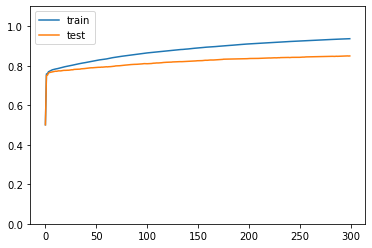

In [653]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
xg=XGBClassifier(random_state=10)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
proba=xg.predict_proba(X_test)[:,1]
print("trian score : ",xg.score(X_train,y_train))
print("test score : ",xg.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr8,tpr8,thresh=roc_curve(y_test,proba)param_range=np.arange(0,300)
train,test=validation_curve(XGBClassifier(random_state=10),X_train,y_train,param_name="n_estimators",
                            param_range=param_range,scoring="accuracy",n_jobs=-1,cv=10)
train_mean=np.mean(train,axis=1)
test_mean=np.mean(test,axis=1)
plt.plot(param_range,train_mean,label="train")
plt.plot(param_range,test_mean,label="test")
plt.ylim([0,1.1])

plt.legend()
plt.show()

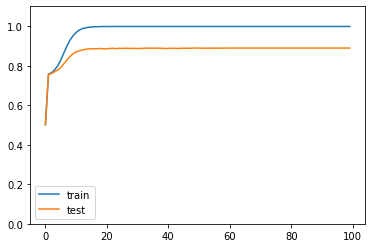

In [655]:
param_range=np.arange(0,100)
train,test=validation_curve(XGBClassifier(random_state=10),X_train,y_train,param_name="max_depth",
                            param_range=param_range,scoring="accuracy",n_jobs=-1,cv=10)
train_mean=np.mean(train,axis=1)
test_mean=np.mean(test,axis=1)
plt.plot(param_range,train_mean,label="train")
plt.plot(param_range,test_mean,label="test")
plt.ylim([0,1.1])

plt.legend()
plt.show()

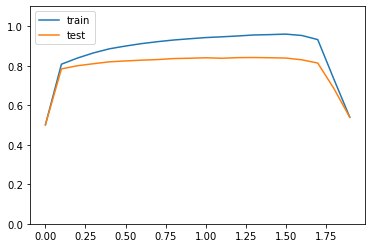

In [656]:
param_range=np.arange(0,2,0.1)
train,test=validation_curve(XGBClassifier(random_state=10),X_train,y_train,param_name="learning_rate",
                            param_range=param_range,scoring="accuracy",n_jobs=-1,cv=10)
train_mean=np.mean(train,axis=1)
test_mean=np.mean(test,axis=1)
plt.plot(param_range,train_mean,label="train")
plt.plot(param_range,test_mean,label="test")
plt.ylim([0,1.1])

plt.legend()
plt.show()

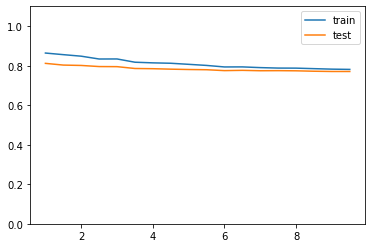

In [657]:
param_range=np.arange(1,10,0.5)
train,test=validation_curve(XGBClassifier(random_state=10),X_train,y_train,param_name="gamma",
                            param_range=param_range,scoring="accuracy",n_jobs=-1,cv=10)
train_mean=np.mean(train,axis=1)
test_mean=np.mean(test,axis=1)
plt.plot(param_range,train_mean,label="train")
plt.plot(param_range,test_mean,label="test")
plt.ylim([0,1.1])

plt.legend()
plt.show()

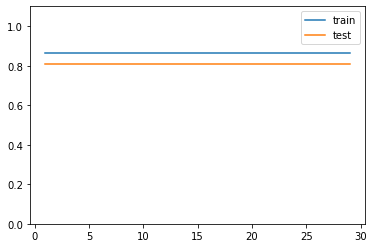

In [658]:
param_range=np.arange(1,30)
train,test=validation_curve(XGBClassifier(random_state=10),X_train,y_train,param_name="min_samples_split",
                            param_range=param_range,scoring="accuracy",n_jobs=-1,cv=10)
train_mean=np.mean(train,axis=1)
test_mean=np.mean(test,axis=1)
plt.plot(param_range,train_mean,label="train")
plt.plot(param_range,test_mean,label="test")
plt.ylim([0,1.1])

plt.legend()
plt.show()

In [659]:
XGBClassifier(min_samples_split=500)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, min_samples_split=500, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [660]:
params={"n_estimators":[500],"min_samples_split":[2],"max_depth":[25]
        ,"gamma":[1,2],"learning_rate":[1.5]}
gs_rf=GridSearchCV(XGBClassifier(random_state=10),params,cv=10,n_jobs=-1).fit(X_train,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

[09:06:19] WARNING: ..\src\learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:06:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'gamma': 1, 'learning_rate': 1.5, 'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 500}
0.8690512253651532


In [662]:
params={"n_estimators":[800],"max_depth":[35]
        ,"gamma":[1],"learning_rate":[1.5]}
gs_rf=GridSearchCV(XGBClassifier(random_state=10),params,cv=10,n_jobs=-1).fit(X_train,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

[09:17:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'gamma': 1, 'learning_rate': 1.5, 'max_depth': 35, 'n_estimators': 800}
0.8704419439563139


In [663]:
params={"n_estimators":[800],"max_depth":[35]
        ,"gamma":[0,1],"learning_rate":[1.5]}
gs_rf=GridSearchCV(XGBClassifier(random_state=10),params,cv=10,n_jobs=-1).fit(X_train,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)
#perfoms better with gamma 0

[09:22:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'gamma': 0, 'learning_rate': 1.5, 'max_depth': 35, 'n_estimators': 800}
0.8783954613306124


In [664]:
params={"n_estimators":[1000],"max_depth":[50]
        ,"gamma":[0],"learning_rate":[1.5]}
gs_rf=GridSearchCV(XGBClassifier(random_state=10),params,cv=10,n_jobs=-1).fit(X_train,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

[09:29:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'gamma': 0, 'learning_rate': 1.5, 'max_depth': 50, 'n_estimators': 1000}
0.8783957258658806


In [665]:
#test on 1000 estimators
params={"n_estimators":[1000],"max_depth":[50]
        ,"gamma":[0],"learning_rate":[1.5]}
gs_rf=GridSearchCV(XGBClassifier(random_state=10),params,cv=10,n_jobs=-1).fit(X_test,y_test)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

[09:36:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'gamma': 0, 'learning_rate': 1.5, 'max_depth': 50, 'n_estimators': 1000}
0.752653381642512


In [666]:
#on test accuracy
params={'gamma': [0], 'learning_rate': [1.5], 'max_depth': [35], 'n_estimators': [800]}
gs_rf=GridSearchCV(XGBClassifier(random_state=10),params,cv=10,n_jobs=-1,scoring="accuracy").fit(X_test,y_test)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

[09:47:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'gamma': 0, 'learning_rate': 1.5, 'max_depth': 35, 'n_estimators': 800}
0.753175422705314


In [667]:
#on test recall
params={'gamma': [0], 'learning_rate': [1.5], 'max_depth': [35], 'n_estimators': [800]}
gs_rf=GridSearchCV(XGBClassifier(random_state=10),params,cv=10,n_jobs=-1,scoring="recall").fit(X_test,y_test)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

[09:56:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'gamma': 0, 'learning_rate': 1.5, 'max_depth': 35, 'n_estimators': 800}
0.7768965517241379


In [668]:
#on test roc-auc
params={'gamma': [0], 'learning_rate': [1.5], 'max_depth': [35], 'n_estimators': [800]}
gs_rf=GridSearchCV(XGBClassifier(random_state=10),params,cv=10,n_jobs=-1,scoring="roc_auc").fit(X_test,y_test)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

[10:00:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'gamma': 0, 'learning_rate': 1.5, 'max_depth': 35, 'n_estimators': 800}
0.8066295758083417


# model comparision

In [669]:
model=[LogisticRegression(),DecisionTreeClassifier(random_state=10),RandomForestClassifier(random_state=10),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(),KNeighborsClassifier(),GaussianNB()]
name=["lr","dt","rf","ab","gb","xgb","knn","nb"]

In [670]:
models=list(zip(model,name))

In [671]:
models

[(LogisticRegression(), 'lr'),
 (DecisionTreeClassifier(random_state=10), 'dt'),
 (RandomForestClassifier(random_state=10), 'rf'),
 (AdaBoostClassifier(), 'ab'),
 (GradientBoostingClassifier(), 'gb'),
 (XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None),
  'xgb'),
 (KNeighborsClassifier(), 'knn'),
 (GaussianNB(), 'nb')]

In [672]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

##### here models of both train and test have been compared for different metrics for comparision

lr: 0.720414 (0.004898)
dt: 0.841627 (0.004614)
rf: 0.879569 (0.004491)
ab: 0.755878 (0.006334)
gb: 0.763527 (0.005163)
[10:04:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

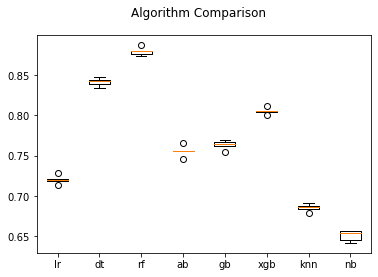

In [673]:
# train accuracy
results = []
names = []
scoring = 'accuracy'
for model,name in models:
	kfold = KFold(n_splits=5)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

lr: 0.711456 (0.015315)
dt: 0.707280 (0.021846)
rf: 0.787936 (0.012757)
ab: 0.751433 (0.013554)
gb: 0.756125 (0.017395)
[10:08:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

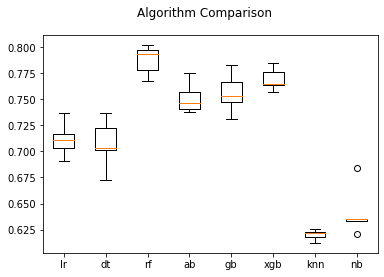

In [674]:
# test accuracy
results = []
names = []
scoring = 'accuracy'
for model,name in models:
	kfold = KFold(n_splits=5)
	cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

lr: 0.767658 (0.006738)
dt: 0.843472 (0.004801)
rf: 0.947879 (0.003603)
ab: 0.792849 (0.006578)
gb: 0.807119 (0.006465)
[10:08:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

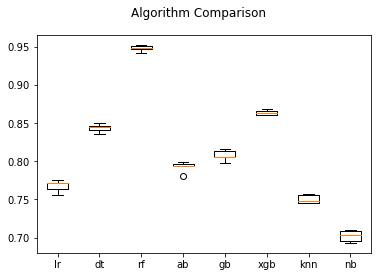

In [675]:
# train roc
results = []
names = []
scoring = 'roc_auc'
for model,name in models:
	kfold = KFold(n_splits=5)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

lr: 0.765581 (0.009564)
dt: 0.707343 (0.021415)
rf: 0.839527 (0.007919)
ab: 0.788826 (0.011039)
gb: 0.801498 (0.009132)
[10:09:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

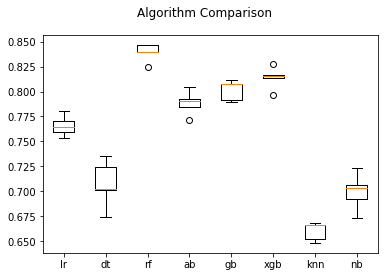

In [676]:
# test roc
results = []
names = []
scoring = 'roc_auc'
for model,name in models:
	kfold = KFold(n_splits=5)
	cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

lr: 0.723437 (0.005925)
dt: 0.852669 (0.004514)
rf: 0.886051 (0.004819)
ab: 0.751411 (0.009552)
gb: 0.760162 (0.008317)
[10:09:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

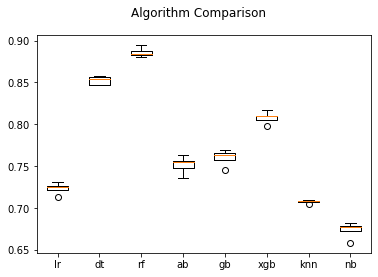

In [677]:
# train f1
results = []
names = []
scoring = 'f1'
for model,name in models:
	kfold = KFold(n_splits=5)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

lr: 0.714320 (0.017381)
dt: 0.720745 (0.023577)
rf: 0.790465 (0.014230)
ab: 0.747084 (0.015573)
gb: 0.754565 (0.019877)
[10:09:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

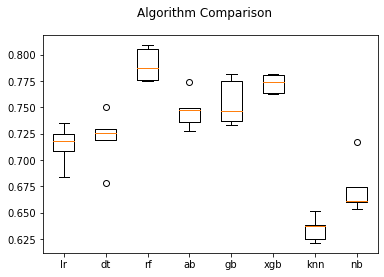

In [678]:
# test f1
results = []
names = []
scoring = 'f1'
for model,name in models:
	kfold = KFold(n_splits=5)
	cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

lr: 0.733010 (0.008956)
dt: 0.918611 (0.006794)
rf: 0.938679 (0.004658)
ab: 0.739796 (0.009553)
gb: 0.751392 (0.009065)
[10:10:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

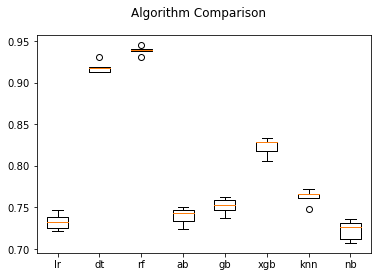

In [679]:
# train recall
results = []
names = []
scoring = 'recall'
for model,name in models:
	kfold = KFold(n_splits=5)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

lr: 0.716651 (0.024072)
dt: 0.750397 (0.022060)
rf: 0.794504 (0.009221)
ab: 0.729134 (0.014046)
gb: 0.744675 (0.008141)
[10:10:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

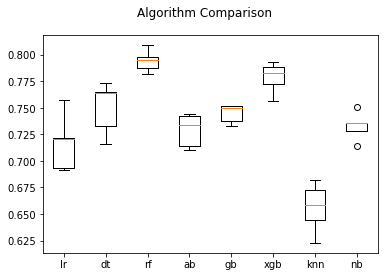

In [680]:
# test recaall
results = []
names = []
scoring = 'recall'
for model,name in models:
	kfold = KFold(n_splits=5)
	cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Final Models After Grid Search CV

### XGB CLASSIFIER

In [426]:
#gamma 1
X=hr.drop("job_change",axis=1)
y=hr.job_change
xg=XGBClassifier(random_state=10,n_estimators=300,learning_rate=0.07,gamma=1,max_depth=20)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
proba=xg.predict_proba(X_test)[:,1]
print("trian score : ",xg.score(X_train,y_train))
print("test score : ",xg.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr8,tpr8,thresh=roc_curve(y_test,proba)

[19:49:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
trian score :  0.9832239558433656
test score :  0.8875369372501304

confusion matrix : 
  [[2365  488]
 [ 159 2741]]

precision score : 0.8488696190771137
recall score :  0.9451724137931035
auc :  0.9375079468677859

classification report : 
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      2853
           1       0.85      0.95      0.89      2900

    accuracy                           0.89      5753
   macro avg       0.89      0.89      0.89      5753
weighted avg       0.89      0.89      0.89      5753



In [443]:
np.mean(cross_val_score(XGBClassifier(random_state=10,n_estimators=300,learning_rate=0.07,gamma=1,max_depth=20),X_train,y_train,cv=2,scoring="precision_macro"))

[21:15:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:15:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8360865406977905

In [437]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
#gamma 1
X=hr.drop("job_change",axis=1)
y=hr.job_change
xg=XGBClassifier(random_state=10,n_estimators=300,learning_rate=0.07,gamma=1,max_depth=20)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
proba=xg.predict_proba(X_test)[:,1]
print("trian score (cv): ",np.mean(cross_val_score(xg,X_train,y_train,cv=10,scoring="accuracy")))
print("test score (cv):",np.mean(cross_val_score(xg,X_test,y_test,cv=10,scoring="accuracy")))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr8,tpr8,thresh=roc_curve(y_test,proba)

In [430]:
#gamma 0 # improved accuracy
X=hr.drop("job_change",axis=1)
y=hr.job_change
xg=XGBClassifier(random_state=10,n_estimators=300,learning_rate=0.07,gamma=0,max_depth=20)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
proba=xg.predict_proba(X_test)[:,1]
print("trian score : ",xg.score(X_train,y_train))
print("test score : ",xg.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr8,tpr8,thresh=roc_curve(y_test,proba)

[20:42:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
trian score :  0.9965665609109479
test score :  0.8972709890491918

confusion matrix : 
  [[2391  462]
 [ 129 2771]]

precision score : 0.8570986699659758
recall score :  0.9555172413793104
auc :  0.9473103327410952

classification report : 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      2853
           1       0.86      0.96      0.90      2900

    accuracy                           0.90      5753
   macro avg       0.90      0.90      0.90      5753
weighted avg       0.90      0.90      0.90      5753



In [432]:
np.mean(cross_val_score(XGBClassifier(random_state=10,n_estimators=300,learning_rate=0.07,gamma=0,max_depth=20),X_train,y_train,cv=10,scoring="accuracy"))

[20:45:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

0.8880004912797836

## Random Forest Classifier

In [429]:
X=hr.drop("job_change",axis=1)
y=hr.job_change
rf=RandomForestClassifier(random_state=10,max_depth=50,min_samples_split=2,n_estimators=50,criterion="gini")
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
proba=xg.predict_proba(X_test)[:,1]
print("trian score : ",rf.score(X_train,y_train))
print("test score : ",rf.score(X_test,y_test))
print()
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n ",confusion_matrix(y_test,y_pred))
print()
print("precision score :",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("auc : ",roc_auc_score(y_test,proba))
print()
print("classification report : \n",classification_report(y_test,y_pred))
fpr8,tpr8,thresh=roc_curve(y_test,proba)

trian score :  0.9981746273197445
test score :  0.9016165478880585

confusion matrix : 
  [[2411  442]
 [ 124 2776]]

precision score : 0.8626476072094469
recall score :  0.9572413793103448
auc :  0.9613128950771723

classification report : 
               precision    recall  f1-score   support

           0       0.95      0.85      0.89      2853
           1       0.86      0.96      0.91      2900

    accuracy                           0.90      5753
   macro avg       0.91      0.90      0.90      5753
weighted avg       0.91      0.90      0.90      5753



### we can see that Random Forest Classifier gives us the best model as per our needs.